## Background and Context

AllLife Bank is a US-based financial institution experiencing growth in its customer base. The majority of its customers are individuals who deposit their funds, making them liability customers. However, only a small portion of these customers also utilize the bank's loan services, classifying them as asset customers. To further expand its loan business and generate increased interest revenue, the bank aims to convert liability customers into personal loan customers while retaining them as depositors.

Previous marketing campaigns conducted by the bank specifically targeting liability customers resulted in a successful conversion rate of over 9%. This positive outcome has inspired the retail marketing department to develop new campaigns that employ better target marketing strategies. 

### Objectives
to determine whether a customer with liabilities will purchase a personal loan or not. Additionally, we aim to identify the variables that have the most impact on this decision and determine which segment of customers should be prioritized for targeting

### Goal

As a Data Scientist at AllLife Bank, the goal is to build a predictive model that assists the marketing department in identifying potential or liability customers with a higher probability of purchasing personal loans, ultimately driving the bank's loan business growth.

### Data Dictionary: 
    
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

### Import Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt       # matplotlib.pyplot plots data
%matplotlib inline 
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE 

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

## Load and review data

In [2]:
plc_df = pd.read_csv("Loan_Modelling.csv")

plc_df.sample(10)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
2018,2019,63,39,160,90089,2,2.10,1,0,0,0,0,1,1
847,848,40,14,73,94539,1,1.50,3,252,0,0,0,1,0
2828,2829,35,10,64,94306,3,0.70,2,230,0,0,0,1,0
3257,3258,59,35,84,92407,1,1.80,3,0,0,0,0,1,0
1069,1070,44,18,75,91203,2,3.50,1,0,1,0,0,1,0
1571,1572,37,13,73,95758,4,2.40,1,0,0,0,0,0,0
3770,3771,40,16,75,94306,3,2.33,1,79,0,0,0,0,0
1925,1926,43,19,81,90245,1,0.30,1,218,0,0,0,1,0
781,782,56,32,158,94588,3,3.70,3,0,1,0,0,1,0
2690,2691,64,38,29,90245,3,0.70,2,0,0,0,0,1,0


The dataset contains information about customers, including their ID, age, experience, income, ZIP code, family size, average credit card spending (CCAvg), education level, mortgage, personal loan status, securities account, CD account, online banking status, and credit card ownership.
The DataFrame is representing different attributes of the customers. Each row corresponds to a specific customer, and each column represents a specific attribute.

There is a negative figure in Experience.

## Exploratory Data Analysis (EDA)

In [3]:
# Check dimension
plc_df.shape

(5000, 14)

The DataFrame has 5000 rows and 14 columns

In [4]:
# check duplicates
plc_df.duplicated().sum()

0

There are no duplicates

In [5]:
# Check the data types
plc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
# check for missing values
plc_df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

The output shows that the Loan Modelling (LM) DataFrame has 5000 entries and 14 columns. The columns section lists the column names, the number of non-null values and data types of each column.

The column type shows that the LM dataset has Thirteen columns with data types (int64), while the one column has float data type

In [7]:
## Describe data

# computing descriptive statistics
plc_df.describe()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93169.257000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,1759.455086,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


The age of the customers in the dataset ranges from 23 to 67, with an approximate mean and median of around 45. The maximum reported experience is 43 years, while the mean and median experience are approximately 20. The customers' income ranges from 8,000 USD to 224,000 USD, with a mean of 73,000 USD and a median of 64,000 USD. It is important to verify the maximum reported salary of 224,000 USD. Additionally, the maximum mortgage value recorded is 635,000 USD, which also requires verification. The average monthly spending on credit cards ranges from 0 USD to 10,000 USD, with a mean of 1,900 USD and a median of 1,500 USD.


### Data Preprocessing

In [8]:
# Finding number of unique values in the columns
print ("nUnique values :  \n\n", plc_df.nunique())  #  count of unique values

nUnique values :  

 ID                    5000
Age                     45
Experience              47
Income                 162
ZIPCode                467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal_Loan            2
Securities_Account       2
CD_Account               2
Online                   2
CreditCard               2
dtype: int64


In [9]:
# We drop ID because we will not need it
plc_df.drop(['ID'],axis=1,inplace=True) #droping id

In [10]:
# check for the unique Age 
plc_df["Age"].unique()

array([25, 45, 39, 35, 37, 53, 50, 34, 65, 29, 48, 59, 67, 60, 38, 42, 46,
       55, 56, 57, 44, 36, 43, 40, 30, 31, 51, 32, 61, 41, 28, 49, 47, 62,
       58, 54, 33, 27, 66, 24, 52, 26, 64, 63, 23], dtype=int64)

In [11]:
# check for the unique Experience
plc_df["Experience"].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43], dtype=int64)

###  Processing Experience

In [12]:
# checking negative and zero values for experience. 
plc_df[plc_df['Experience']<0]['Age'].describe()

count    52.000000
mean     24.519231
std       1.475159
min      23.000000
25%      24.000000
50%      24.000000
75%      25.000000
max      29.000000
Name: Age, dtype: float64

There are 52 customers from age group 23 - 29 have negative values in Experience

In [13]:
# Sorting and displaying the rows in the 'plc_df' dataframe where the 'Experience' column has negative values, in ascending order.
plc_df[plc_df['Experience']<0].sort_values(by='Experience',ascending=True)

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4514,24,-3,41,91768,4,1.00,3,0,0,0,0,1,0
2618,23,-3,55,92704,3,2.40,2,145,0,0,0,1,0
4285,23,-3,149,93555,2,7.20,1,0,0,0,0,1,0
3626,24,-3,28,90089,4,1.00,3,0,0,0,0,0,0
2717,23,-2,45,95422,4,0.60,2,0,0,0,0,1,1
2876,24,-2,80,91107,2,1.60,3,238,0,0,0,0,0
3130,23,-2,82,92152,2,1.80,2,0,0,1,0,0,1
2466,24,-2,80,94105,2,1.60,3,0,0,0,0,1,0
3796,24,-2,50,94920,3,2.40,2,0,0,1,0,0,0
2962,23,-2,81,91711,2,1.80,2,0,0,0,0,0,0


In [14]:
# Calculating descriptive statistics for the 'Experience' column grouped by 'Age' and 'Education' in the 'plc_df' dataframe.
plc_df.groupby(["Age","Education"])["Experience"].describe().T

Age              23                   24                       25             \
Education         1         2          1        2    3          1          2   
count      7.000000  5.000000  13.000000  8.00000  7.0  23.000000  11.000000   
mean      -1.285714 -2.200000  -0.692308 -0.87500 -2.0   0.521739  -0.272727   
std        0.755929  0.447214   0.947331  0.64087  1.0   0.790257   0.646670   
min       -3.000000 -3.000000  -2.000000 -2.00000 -3.0  -1.000000  -1.000000   
25%       -1.000000 -2.000000  -2.000000 -1.00000 -2.5   0.000000  -1.000000   
50%       -1.000000 -2.000000   0.000000 -1.00000 -2.0   1.000000   0.000000   
75%       -1.000000 -2.000000   0.000000 -0.75000 -2.0   1.000000   0.000000   
max       -1.000000 -2.000000   0.000000  0.00000  0.0   1.000000   1.000000   

Age                          26            ...         64         65  \
Education          3          1         2  ...          3          1   
count      19.000000  30.000000  24.00000  ...  30.000000  30.000000   
mean       -0.526316   1.433333   0.75000  ...  38.533333  39.866667   
std         0.696692   0.817200   0.84699  ...   1.756433   0.730297   
min        -2.000000   0.000000  -1.00000  ...  34.000000  39.000000   
25%        -1.000000   1.000000   0.00000  ...  38.000000  39.000000   
50%        -1.000000   2.000000   1.00000  ...  39.000000  40.000000   
75%         0.000000   2.000000   1.00000  ...  40.000000  40.000000   
max         1.000000   2.000000   2.00000  ...  40.000000  41.000000   

Age                                     66                               67  \
Education          2          3          1          2          3          1   
count      23.000000  27.000000   9.000000   5.000000  10.000000   5.000000   
mean       40.086957  39.518519  41.111111  41.400000  40.400000  41.600000   
std         0.733178   1.553417   0.333333   0.547723   1.646545   0.894427   
min        39.000000  35.000000  41.000000  41.000000  36.000000  41.000000   
25%        40.000000  39.000000  41.000000  41.000000  40.250000  41.000000   
50%        40.000000  40.000000  41.000000  41.000000  41.000000  41.000000   
75%        41.000000  41.000000  41.000000  42.000000  41.000000  42.000000   
max        41.000000  41.000000  42.000000  42.000000  42.000000  43.000000   

Age                             
Education          2         3  
count       3.000000   4.00000  
mean       42.666667  41.50000  
std         0.577350   0.57735  
min        42.000000  41.00000  
25%        42.500000  41.00000  
50%        43.000000  41.50000  
75%        43.000000  42.00000  
max        43.000000  42.00000  

[8 rows x 134 columns]

It appears that the Experience values are negative for certain observations, such as those with ages 23 and 24, among others. Considering the age and education of these individuals, it seems that negative values are erroneous. To address this, the absolute values of experience will be taken instead.

In [15]:
# Convering negative values in Experience using absolute function
plc_df['Experience']=np.abs(plc_df['Experience'])

In [16]:
# Sanity check
plc_df[plc_df['Experience']<0].sort_values(by='Experience',ascending=True)

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard


In [17]:
plc_df["Experience"].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, 34,  0, 38, 40, 33,  4, 42, 43], dtype=int64)

We no longer have negative values in Experience

In [18]:
# check for the unique Income
plc_df["Income"].unique()

array([ 49,  34,  11, 100,  45,  29,  72,  22,  81, 180, 105, 114,  40,
       112, 130, 193,  21,  25,  63,  62,  43, 152,  83, 158,  48, 119,
        35,  41,  18,  50, 121,  71, 141,  80,  84,  60, 132, 104,  52,
       194,   8, 131, 190,  44, 139,  93, 188,  39, 125,  32,  20, 115,
        69,  85, 135,  12, 133,  19,  82, 109,  42,  78,  51, 113, 118,
        64, 161,  94,  15,  74,  30,  38,   9,  92,  61,  73,  70, 149,
        98, 128,  31,  58,  54, 124, 163,  24,  79, 134,  23,  13, 138,
       171, 168,  65,  10, 148, 159, 169, 144, 165,  59,  68,  91, 172,
        55, 155,  53,  89,  28,  75, 170, 120,  99, 111,  33, 129, 122,
       150, 195, 110, 101, 191, 140, 153, 173, 174,  90, 179, 145, 200,
       183, 182,  88, 160, 205, 164,  14, 175, 103, 108, 185, 204, 154,
       102, 192, 202, 162, 142,  95, 184, 181, 143, 123, 178, 198, 201,
       203, 189, 151, 199, 224, 218], dtype=int64)

In [19]:
# check for the unique ZipCode
plc_df["ZIPCode"].unique()

array([91107, 90089, 94720, 94112, 91330, 92121, 91711, 93943, 93023,
       94710, 90277, 93106, 94920, 91741, 95054, 95010, 94305, 91604,
       94015, 90095, 91320, 95521, 95064, 90064, 94539, 94104, 94117,
       94801, 94035, 92647, 95814, 94114, 94115, 92672, 94122, 90019,
       95616, 94065, 95014, 91380, 95747, 92373, 92093, 94005, 90245,
       95819, 94022, 90404, 93407, 94523, 90024, 91360, 95670, 95123,
       90045, 91335, 93907, 92007, 94606, 94611, 94901, 92220, 93305,
       95134, 94612, 92507, 91730, 94501, 94303, 94105, 94550, 92612,
       95617, 92374, 94080, 94608, 93555, 93311, 94704, 92717, 92037,
       95136, 94542, 94143, 91775, 92703, 92354, 92024, 92831, 92833,
       94304, 90057, 92130, 91301, 92096, 92646, 92182, 92131, 93720,
       90840, 95035, 93010, 94928, 95831, 91770, 90007, 94102, 91423,
       93955, 94107, 92834, 93117, 94551, 94596, 94025, 94545, 95053,
       90036, 91125, 95120, 94706, 95827, 90503, 90250, 95817, 95503,
       93111, 94132,

In [20]:
# check for the unique Family in ascending order
sorted(plc_df["Family"].unique())

[1, 2, 3, 4]

In [21]:
# check for the unique CCAvg 
plc_df["CCAvg"].unique()

array([ 1.6 ,  1.5 ,  1.  ,  2.7 ,  0.4 ,  0.3 ,  0.6 ,  8.9 ,  2.4 ,
        0.1 ,  3.8 ,  2.5 ,  2.  ,  4.7 ,  8.1 ,  0.5 ,  0.9 ,  1.2 ,
        0.7 ,  3.9 ,  0.2 ,  2.2 ,  3.3 ,  1.8 ,  2.9 ,  1.4 ,  5.  ,
        2.3 ,  1.1 ,  5.7 ,  4.5 ,  2.1 ,  8.  ,  1.7 ,  0.  ,  2.8 ,
        3.5 ,  4.  ,  2.6 ,  1.3 ,  5.6 ,  5.2 ,  3.  ,  4.6 ,  3.6 ,
        7.2 ,  1.75,  7.4 ,  2.67,  7.5 ,  6.5 ,  7.8 ,  7.9 ,  4.1 ,
        1.9 ,  4.3 ,  6.8 ,  5.1 ,  3.1 ,  0.8 ,  3.7 ,  6.2 ,  0.75,
        2.33,  4.9 ,  0.67,  3.2 ,  5.5 ,  6.9 ,  4.33,  7.3 ,  4.2 ,
        4.4 ,  6.1 ,  6.33,  6.6 ,  5.3 ,  3.4 ,  7.  ,  6.3 ,  8.3 ,
        6.  ,  1.67,  8.6 ,  7.6 ,  6.4 , 10.  ,  5.9 ,  5.4 ,  8.8 ,
        1.33,  9.  ,  6.7 ,  4.25,  6.67,  5.8 ,  4.8 ,  3.25,  5.67,
        8.5 ,  4.75,  4.67,  3.67,  8.2 ,  3.33,  5.33,  9.3 ,  2.75])

There are white spaces before the commas. As they are numerical values we can ignore

In [22]:
# check for the unique Education in ascendingl order
sorted(plc_df["Education"].unique())

[1, 2, 3]

In [23]:
# check for the unique Mortgage
plc_df["Mortgage"].unique()

array([  0, 155, 104, 134, 111, 260, 163, 159,  97, 122, 193, 198, 285,
       412, 153, 211, 207, 240, 455, 112, 336, 132, 118, 174, 126, 236,
       166, 136, 309, 103, 366, 101, 251, 276, 161, 149, 188, 116, 135,
       244, 164,  81, 315, 140,  95,  89,  90, 105, 100, 282, 209, 249,
        91,  98, 145, 150, 169, 280,  99,  78, 264, 113, 117, 325, 121,
       138,  77, 158, 109, 131, 391,  88, 129, 196, 617, 123, 167, 190,
       248,  82, 402, 360, 392, 185, 419, 270, 148, 466, 175, 147, 220,
       133, 182, 290, 125, 124, 224, 141, 119, 139, 115, 458, 172, 156,
       547, 470, 304, 221, 108, 179, 271, 378, 176,  76, 314,  87, 203,
       180, 230, 137, 152, 485, 300, 272, 144,  94, 208, 275,  83, 218,
       327, 322, 205, 227, 239,  85, 160, 364, 449,  75, 107,  92, 187,
       355, 106, 587, 214, 307, 263, 310, 127, 252, 170, 265, 177, 305,
       372,  79, 301, 232, 289, 212, 250,  84, 130, 303, 256, 259, 204,
       524, 157, 231, 287, 247, 333, 229, 357, 361, 294,  86, 32

In [24]:
# check for the unique Personal Loan in ascending order
sorted(plc_df["Personal_Loan"].unique())

[0, 1]

In [25]:
# check for the unique Securities Account in ascending order
sorted(plc_df["Securities_Account"].unique())

[0, 1]

In [26]:
# check for the unique CD Account in ascending order
sorted(plc_df["CD_Account"].unique())

[0, 1]

In [27]:
# check for the unique Online in ascending order
sorted(plc_df["Online"].unique())

[0, 1]

In [28]:
# check for the unique CreditCard in ascending order
sorted(plc_df["CreditCard"].unique())

[0, 1]

### Data Visualization

##### Univariate Analysis: Numerical Features

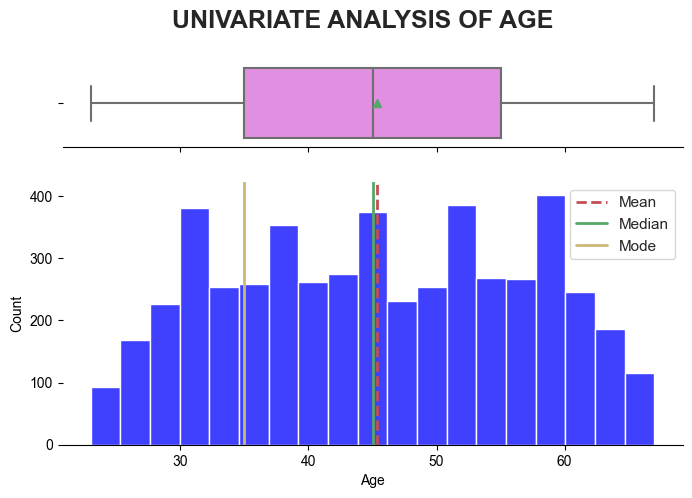

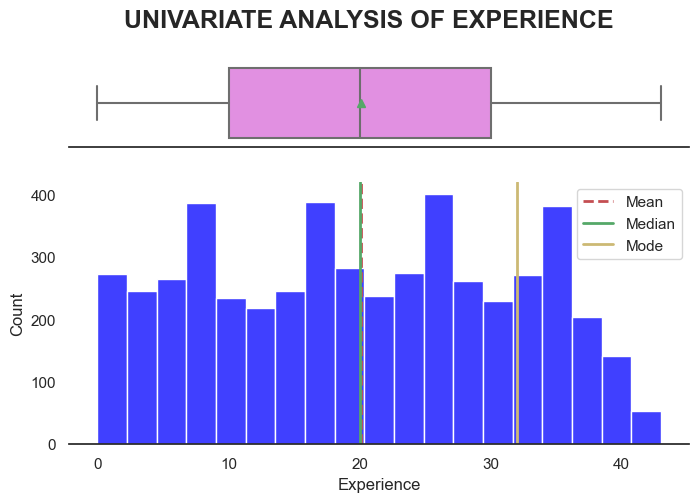

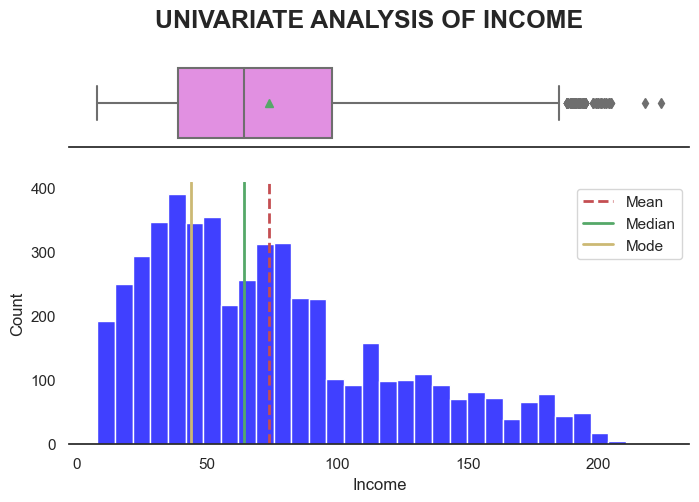

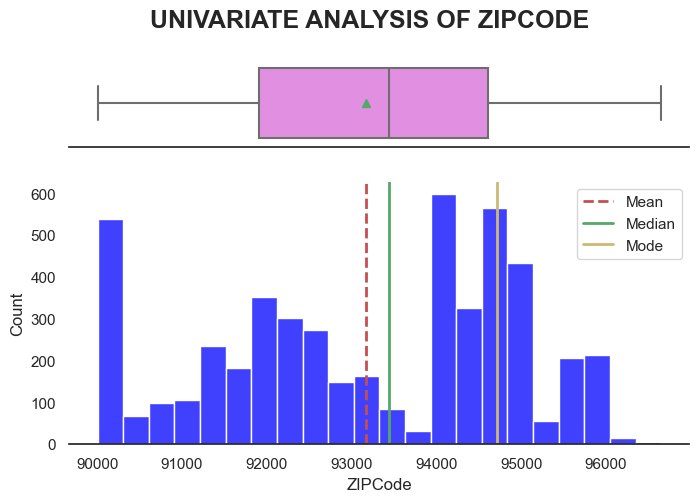

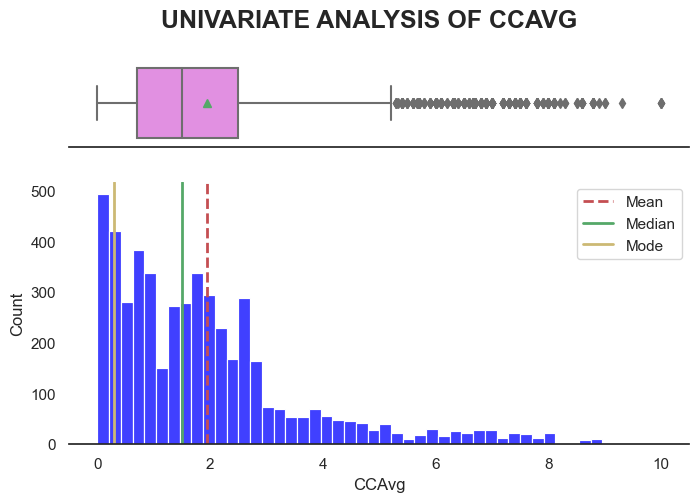

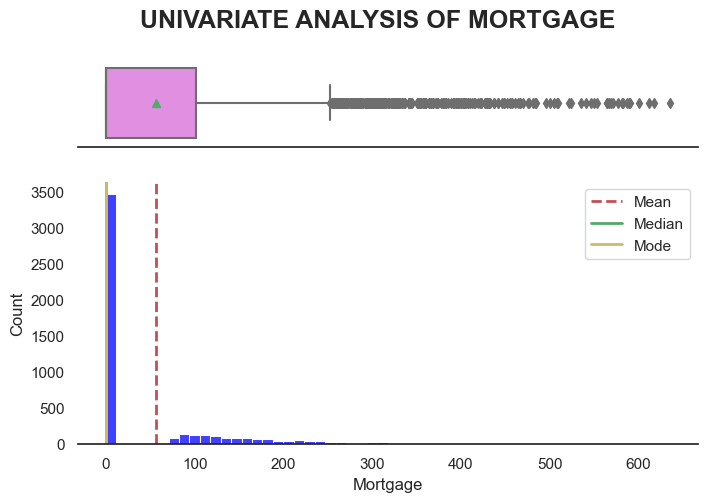

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select all quantitative columns.
list_col = ['Age', 'Experience', 'Income', 'ZIPCode', 'CCAvg', 'Mortgage']

# Function to plot distribution for each quantitative column
def plot_distribution(data):
    name = data.name.upper()
    fig, (ax_box, ax_dis) = plt.subplots(nrows=2, sharex=True, gridspec_kw={"height_ratios": (.25, .75)}, figsize=(8, 5))
    
    mean = data.mean()
    median = data.median()
    mode = data.mode().tolist()[0]
    
    sns.set_theme(style="white")
    fig.suptitle("UNIVARIATE ANALYSIS OF " + name, fontsize=18, fontweight='bold')
    
    sns.boxplot(x=data, showmeans=True, orient='h', color="violet", ax=ax_box)
    ax_box.set(xlabel='')
    
    sns.despine(top=True, right=True, left=True)
    sns.histplot(data, kde=False, color='blue', ax=ax_dis)
    ax_dis.axvline(mean, color='r', linestyle='--', linewidth=2)
    ax_dis.axvline(median, color='g', linestyle='-', linewidth=2)
    ax_dis.axvline(mode, color='y', linestyle='-', linewidth=2)
    
    plt.legend({'Mean': mean, 'Median': median, 'Mode': mode})

# Plot distribution for each column in list_col
for col in list_col:
    plot_distribution(plc_df[col])


Both "Age" and "Experience" show a similar distribution with no outliers. "Income" is right-skewed and contains some outliers on the higher side that could be clipped. "Average monthly credit" is also right-skewed and has numerous outliers on the higher side that could be clipped. "Mortgage" is mostly 0, but it is right-skewed and contains several outliers on the higher side that could be clipped. ZIPCode is left-skewed with no outliers

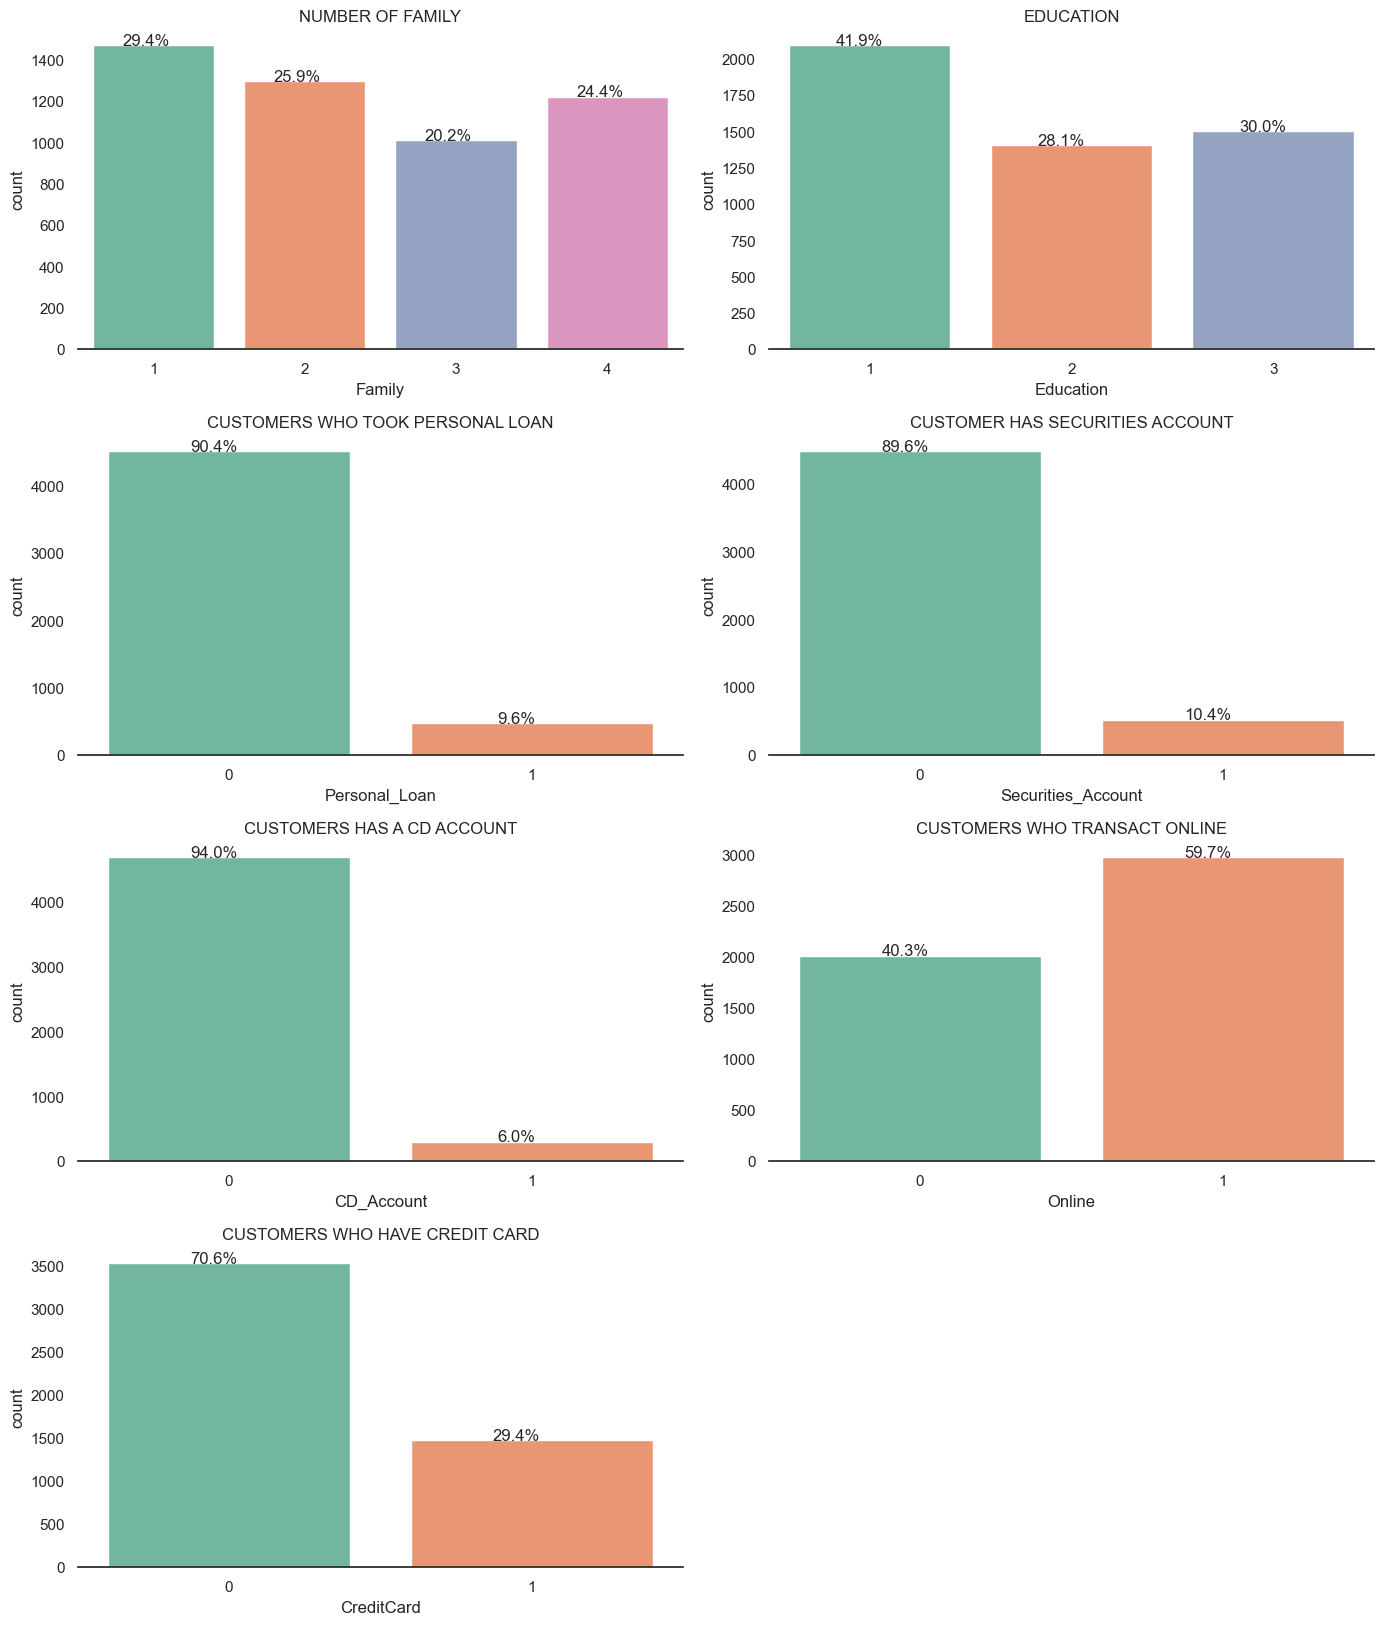

In [30]:
list_col2 = ['Family', 'Education', 'Personal_Loan', 'Securities_Account',
             'CD_Account', 'Online', 'CreditCard']
title = ['Number of Family', 'Education', 'Customers who took Personal Loan',
         'Customer has Securities Account', 'Customers has a CD Account',
         'Customers who transact Online', 'Customers who have Credit Card']

plt.figure(figsize=(14, 20))
sns.set_theme(style="white")

for i, variable in enumerate(list_col2):
    plt.subplot(5, 2, i+1)
    order = plc_df[variable].value_counts(ascending=False).index
    sns.set_palette('Set2')
    ax = sns.countplot(x=plc_df[variable], data=plc_df)
    sns.despine(top=True, right=True, left=True)
    
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / len(plc_df[variable]))
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        plt.annotate(percentage, (x, y), ha='center')
    
    plt.tight_layout()
    plt.title(title[i].upper())


Approximately 29.4% of customers are single.
Around 41.9% of customers have an undergraduate education.
About 9.6% of customers have purchased a personal loan from the bank.
Around 10.4% of customers have a securities account with the bank.
Approximately 6% of customers have a CD account.
Around 60% of customers engage in online transactions.
Approximately 29.4% of customers have credit cards.

##### Bivariate & Multivariate Analysis

In [31]:
# Select numerical variables
plc_df_data =plc_df.select_dtypes(include = "number")

In [32]:
# check for correlation
mat_corr = plc_df_data.corr()
mat_corr

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
Age,1.000000,0.993991,-0.055269,-0.030530,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.993991,1.000000,-0.046876,-0.030837,-0.051851,-0.049738,0.013919,-0.011097,-0.008304,-0.000989,0.009735,0.014051,0.008851
Income,-0.055269,-0.046876,1.000000,-0.030709,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIPCode,-0.030530,-0.030837,-0.030709,1.000000,0.027512,-0.012188,-0.008266,0.003614,-0.002974,0.002422,0.021671,0.028317,0.024033
Family,-0.046418,-0.051851,-0.157501,0.027512,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.049738,0.645984,-0.012188,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.013919,-0.187524,-0.008266,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.011097,0.206806,0.003614,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal_Loan,-0.007726,-0.008304,0.502462,-0.002974,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities_Account,-0.000436,-0.000989,-0.002616,0.002422,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028


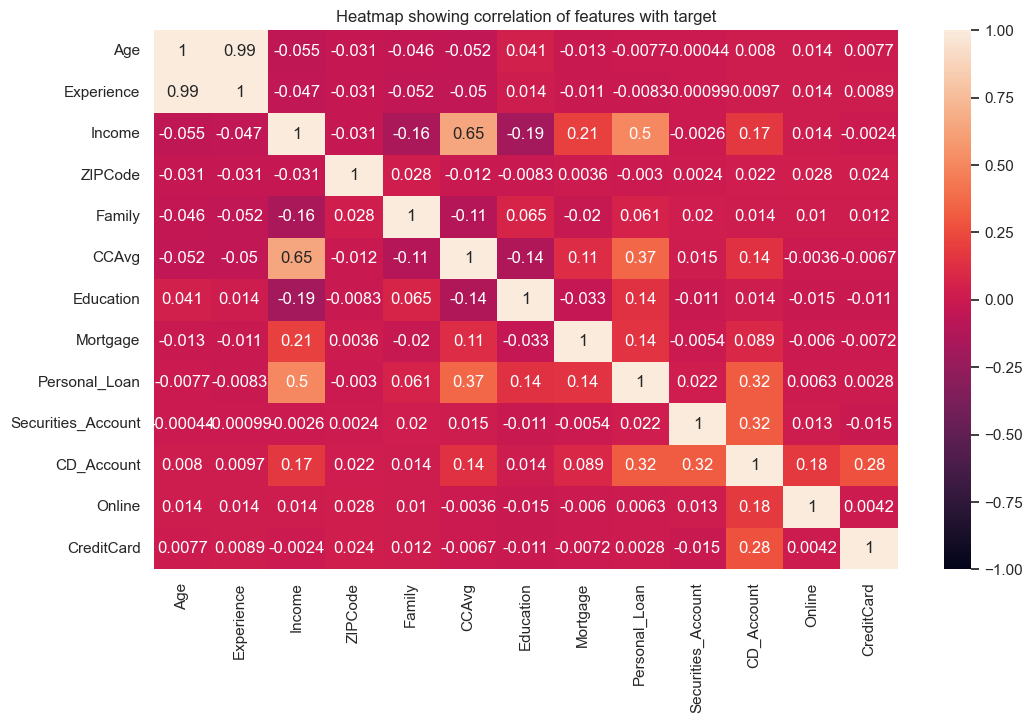

In [33]:
plt.figure(figsize = (12,7))
sns.heatmap(mat_corr, annot= True, vmin = -1, vmax = 1)
plt.title("Heatmap showing correlation of features with target")

# save plot
plt.savefig("Heatmap showing correlation of features with target.png", bbox_inches='tight')

plt.show()

There is a moderate positive correlation between personal loan and income (0.5), personal loan and average spending on credit cards (0.37), and personal loan and CD accounts (0.32), although these correlations are not very strong.
As expected, age and experience are highly correlated (0.99), which creates issues of multicollinearity.
There is a positive correlation between income and average spending on credit cards (0.65).
Mortgage has a weak correlation with income (0.21).

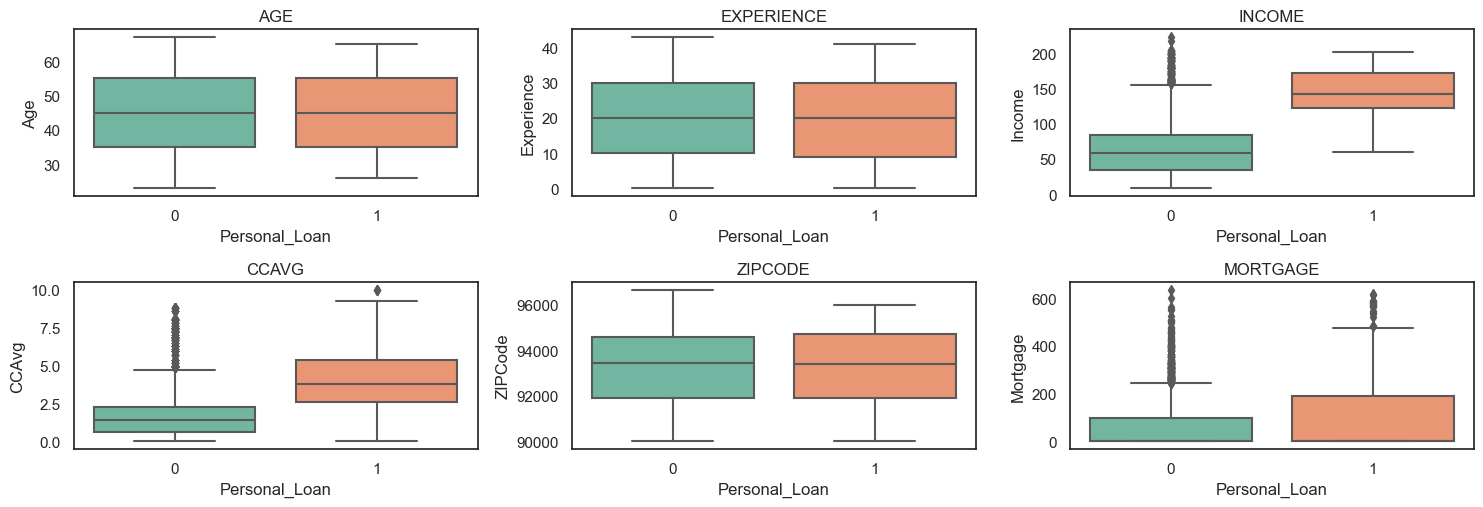

In [34]:
numeric_columns = ['Age', 'Experience', 'Income', 'CCAvg', 'ZIPCode', 'Mortgage']

plt.figure(figsize=(15, 25))
sns.set_palette(sns.color_palette("Set2", 8))

for i, variable in enumerate(numeric_columns):
    plt.subplot(10, 3, i + 1)
    sns.boxplot(x='Personal_Loan', y=variable, data=plc_df)
    plt.tight_layout()
    plt.title(variable.upper())


Individuals who have a higher income have previously chosen to avail personal loans.

Customers with significant mortgage amounts have shown a preference for taking out loans.

Clients who exhibit higher levels of average monthly credit card usage tend to opt for loans.

Customers with higher income tend to have elevated levels of average credit card usage and mortgage, suggesting a correlation.


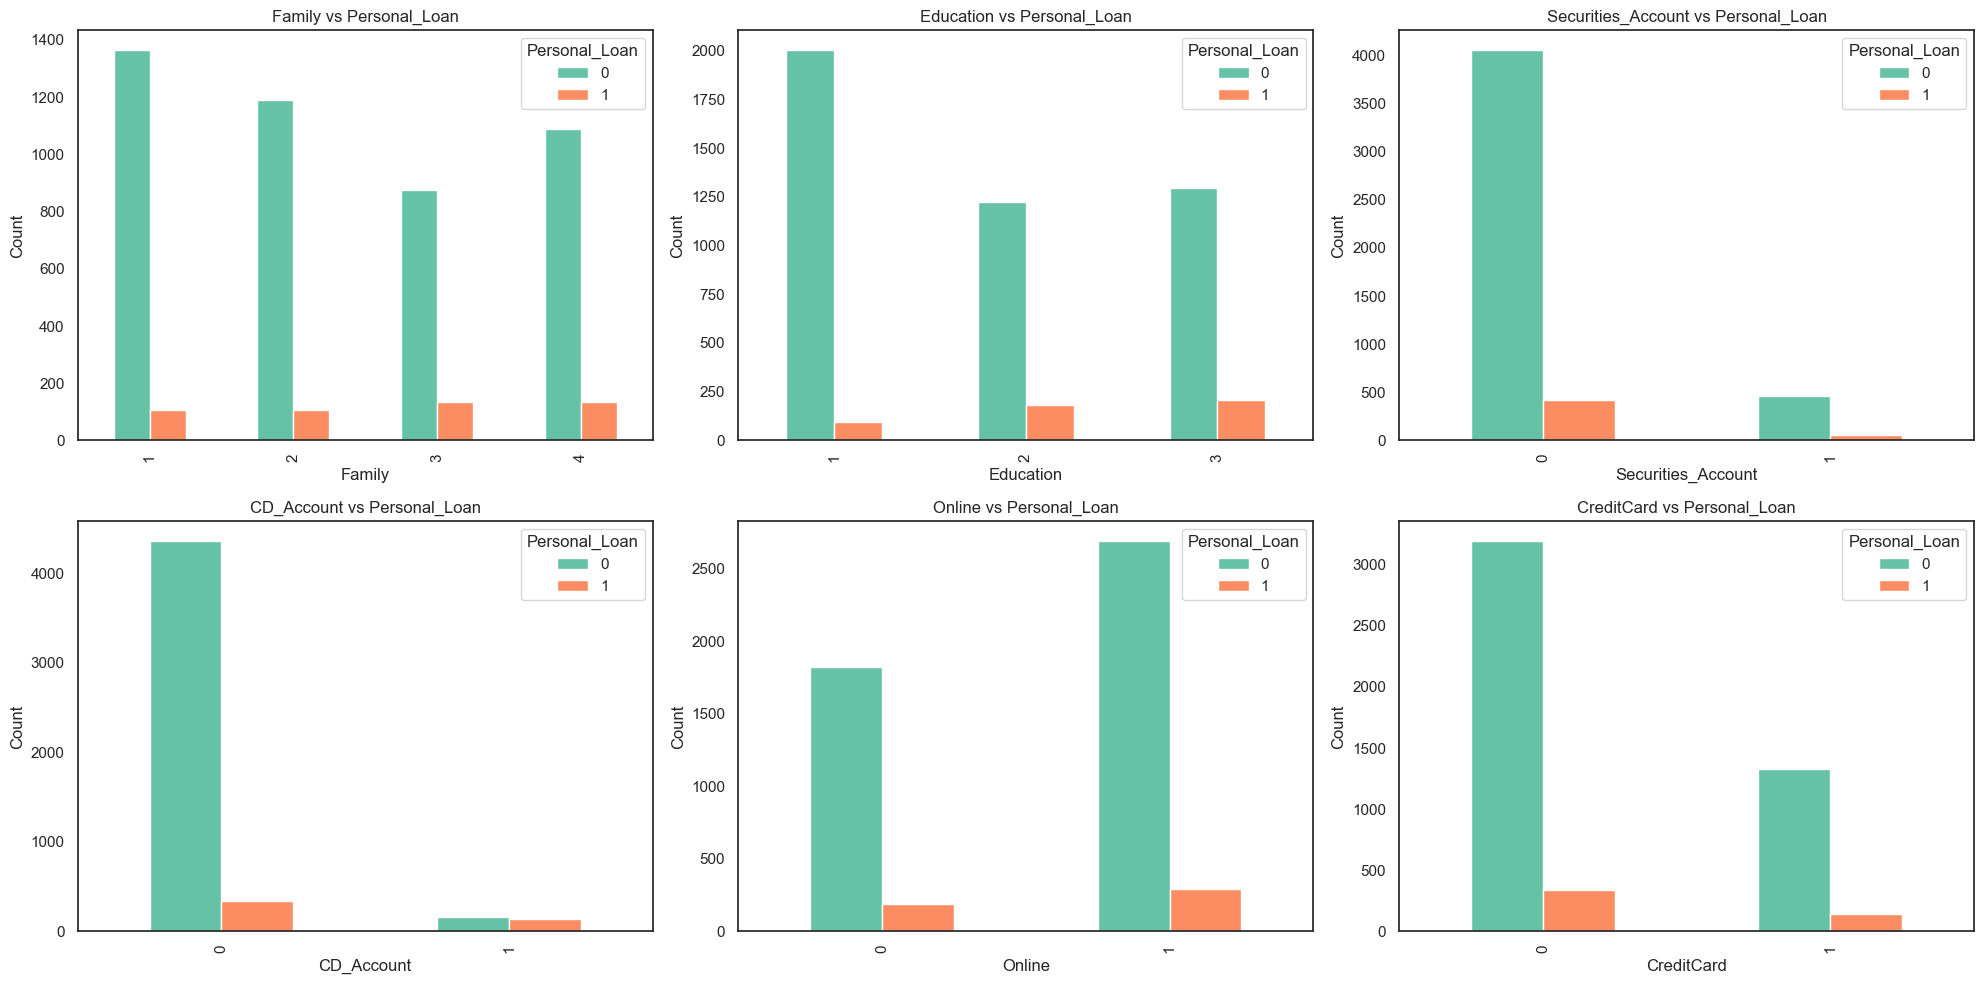

In [35]:
# Define the features and the target variable
x_feat_1 = ['Family', 'Education', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']
y_feat_2 = "Personal_Loan"

# Create subplots with the specified number of rows and columns
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

for i, x_feat in enumerate(x_feat_1):
    # Calculate the counts of each category within the feature and target variable
    counts =plc_df.groupby([x_feat, y_feat_2]).size().unstack().fillna(0)
    
    # Create a bar plot using the counts
    ax = axes[i//3, i%3]
    counts.plot(kind='bar', ax=ax)
    
    # Set x-label, y-label, and title for the plot
    ax.set_xlabel(x_feat)
    ax.set_ylabel("Count")
    ax.set_title(f"{x_feat} vs {y_feat_2}")
    
    # Rotate x-axis labels by 90 degrees
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    
    # Add a legend with the title for the target variable
    ax.legend(title=y_feat_2)

# Adjust the layout to avoid overlapping
plt.tight_layout()

# Save the plot as an image file
plt.savefig("bar_plots_count_personalloan.png")

# Display the plot
plt.show()


Graduate and Advanced/Professional degree holders tend to have higher monthly credit card usage and are more likely to borrow loans from the bank. Customers who had a family size of 3 or more members were more likely to borrow loans from the bank. Customers who held a certificate of deposit with the bank had a history of borrowing loans. The majority of customers who had a personal loan with the bank utilized online facilities.

#### Treating Outliers

In [36]:
plc_df_data.drop("Personal_Loan", axis = 1, inplace = True)

plc_df_data.columns

Index(['Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online',
       'CreditCard'],
      dtype='object')

In [37]:
# Function to treat outliers in numerical variables using IQR method
def treat_outliers(plc_df, col):
    """
    Treat outliers in numerical variables
    df: DataFrame
    col: str, name of the numerical variable
    """
    Q1 = plc_df[col].quantile(0.25) # first quartile
    Q3 = plc_df[col].quantile(0.75) # third quartile
    IQR = Q3 - Q1 # interquartile range
    lower_whisker = Q1 - (1.5 * IQR) # calculate lower whisker
    upper_whisker = Q3 + (1.5 * IQR) # calculate upper whisker
    plc_df[col] = np.clip(plc_df[col], lower_whisker, upper_whisker) # clip the values of the variable between the lower and upper whisker
    return plc_df

In [38]:
# Function to treat outliers in all numerical variables of a DataFrame
def treat_outliers_all(plc_df, col_list):
    """
    Treat outliers in all numerical variables of a DataFrame
    df: DataFrame
    col_list: list of str, names of the numerical variables
    """
    for c in col_list:
        plc_df = treat_outliers(plc_df, c)
    return plc_df

In [39]:
plc_df = treat_outliers_all(plc_df, plc_df_data)

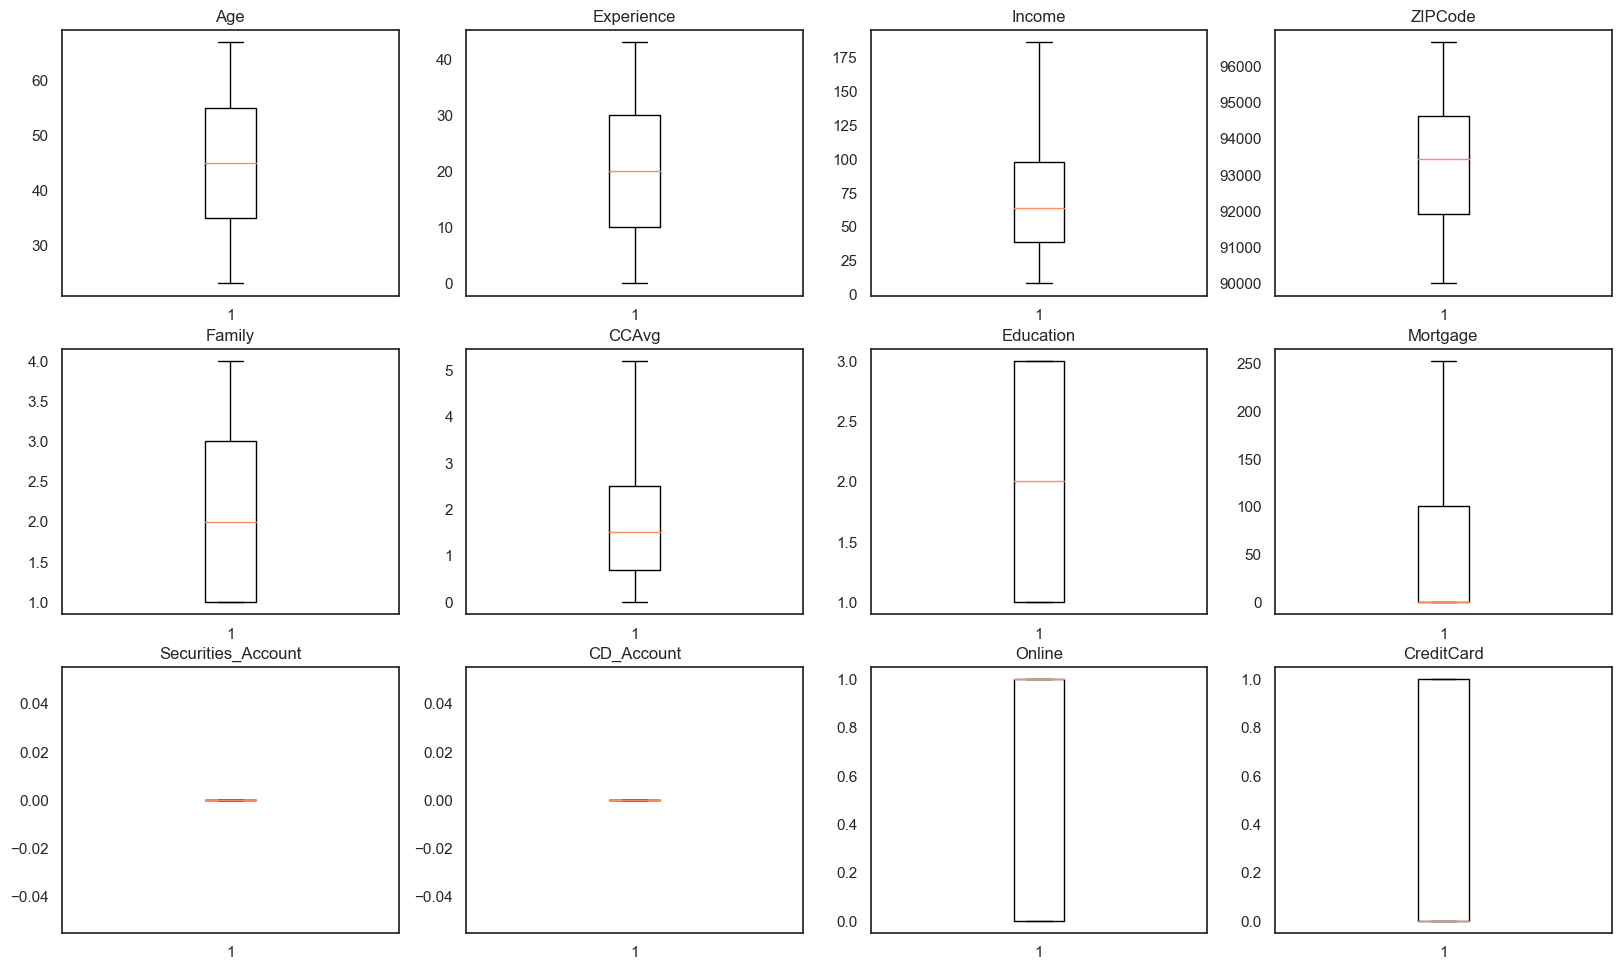

In [40]:
plt.figure(figsize = (20, 20))

for i, variable in enumerate (plc_df_data):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(plc_df[variable], whis = 1.5)
    plt.title(variable)

plt.savefig("outlier_treated_plots.png")
plt.show()

The outliers have been treated by clipping

###  Model Building

In [41]:
# We first need to select the features that we want to use
plc_df.columns

Index(['Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

In [42]:
# Select features and target

x= plc_df[['Age', 'Experience', 'Income','Family', 'CCAvg','Education', 'Mortgage','Securities_Account',
       'CD_Account', 'Online', 'CreditCard']]

y= plc_df['Personal_Loan']

In [43]:
x.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49.0,4,1.6,1,0.0,0,0,0,0
1,45,19,34.0,3,1.5,1,0.0,0,0,0,0
2,39,15,11.0,1,1.0,1,0.0,0,0,0,0
3,35,9,100.0,1,2.7,2,0.0,0,0,0,0
4,35,8,45.0,4,1.0,2,0.0,0,0,0,1


In [44]:
y.value_counts()

0    4520
1     480
Name: Personal_Loan, dtype: int64

In [45]:
#Value count
y.value_counts(normalize= True)

0    0.904
1    0.096
Name: Personal_Loan, dtype: float64

In [46]:
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)


Shape of x: (5000, 11)
Shape of y: (5000,)


In [47]:
# x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, stratify = y,
#                                                    random_state = 0)

In [48]:
# Split the data into training and testing sets
x_train_val, x_test, y_train_val, y_test = train_test_split(x, y, test_size=0.2, 
                                                            random_state=0, stratify=y)
# Further split the training set into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, 
                                                  test_size=0.2, random_state=0, stratify=y_train_val)

In [49]:
x_train.shape

(3200, 11)

In [50]:
x_test.shape

(1000, 11)

In [51]:
x_val.shape

(800, 11)

In [52]:
# Scale the feature matrices using StandardScaler

# Normalize the data
scaler = StandardScaler()# mean of zero and standard deviation of 1

x_train_sd = scaler.fit_transform(x_train)  
x_val_sd = scaler.transform(x_val)
x_test_sd = scaler.transform(x_test)

In [53]:
# build the model

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state= 0)

log_reg.fit(x_train_sd, y_train)

LogisticRegression(random_state=0)

In [54]:
log_reg.score(x_train_sd, y_train)

0.9465625

In [55]:
log_reg.score(x_val, y_val)

C:\Users\SERWAH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


0.09625

In [56]:
log_reg.score(x_test, y_test)

C:\Users\SERWAH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


0.096

#### Confusion Matrix

In [57]:
from utils import model_performance_classification

##### Model 1

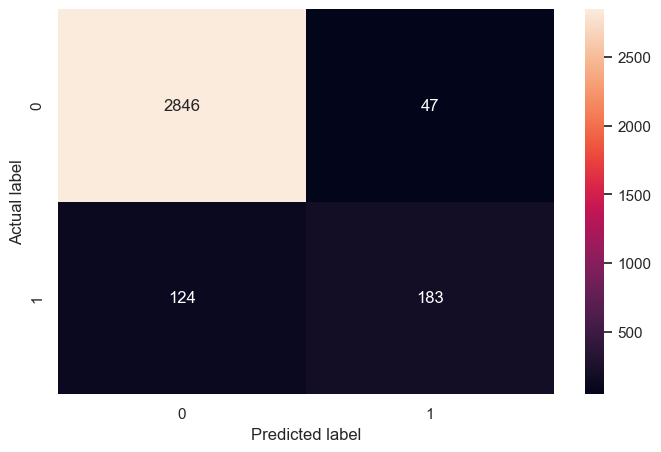

,Accuracy,Recall,Precision,F1-score
0,0.946562,0.596091,0.795652,0.681564


In [59]:
log_reg_train = model_performance_classification(log_reg, x_train_sd,y_train)
log_reg_train

2846(TN) and 183(TP) are the correct predictions of the model 124(FN) and 47(FP) are the wrong predictions the model makes.

~ FN- wrongly predicting positive class as negative~

The model predicts correctly that 2846 people do not have personal loans and 183 people person loans.

The model predicts wrongly that 47 people do not have personal loans have personal loans and 124 people who have personal loans are indicating they do not have personal loans earning according to the confusion matrix.

Accuracy of 0.9466 is how much correct predictions were made on personal loans ((TN+TP)/(TN+TP+FN+FP))

Precision of 0.796 is how much model got correctly out of the positive prediction ((TP)/(TP+FP)). Model got 79.60% (183) correctly on those who have personal loans. Precision is on the postive predictions of the data

Recall is out of those who have loans (FN+TP) the model predicted correctly 59.61% (TP)(183). Recall is on the positive class in the data

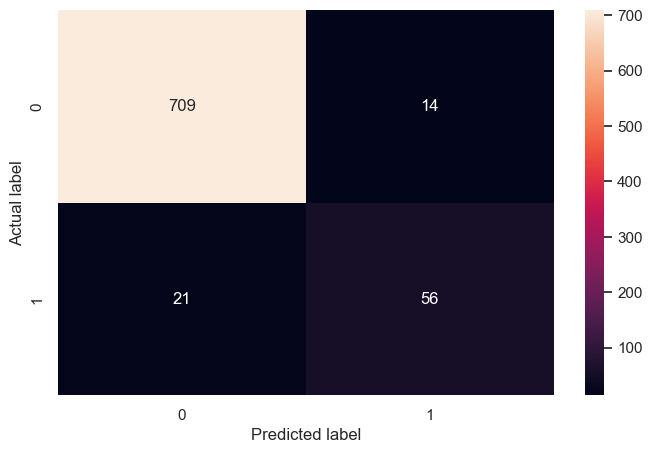

,Accuracy,Recall,Precision,F1-score
0,0.95625,0.727273,0.8,0.761905


In [60]:
log_reg_val = model_performance_classification(log_reg, x_val_sd,y_val)
log_reg_val

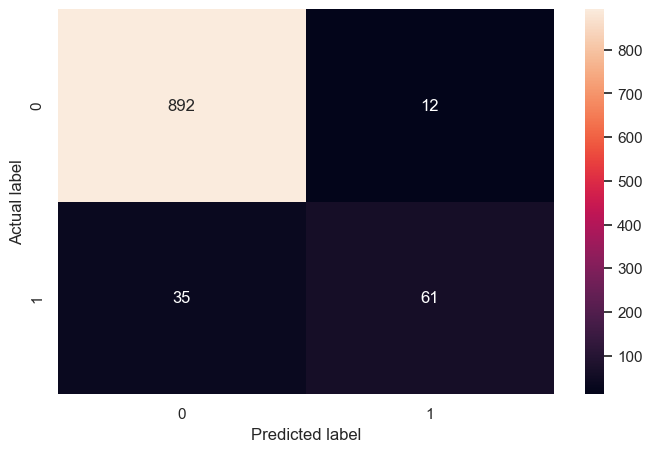

,Accuracy,Recall,Precision,F1-score
0,0.953,0.635417,0.835616,0.721893


In [61]:
log_reg_test = model_performance_classification(log_reg, x_test_sd,y_test)
log_reg_test

It appears that the model is generalizing well and not overfitting or underfitting.

Here's an analysis of the metrics:

Training Set: The model achieves good accuracy, recall, precision, and F1-score on the training set, indicating that it is learning and capturing patterns from the training data.

Validation Set: The metrics on the validation set are also quite high, showing that the model is performing well on unseen data. The accuracy, recall, precision, and F1-score are all comparable to or slightly better than the metrics on the training set.

Testing Set: The metrics on the testing set are also consistent with the performance on the training and validation sets. The accuracy, recall, precision, and F1-score are all high, indicating that the model is generalizing well to new, unseen data.

Overall, the consistent and high performance of the model across all three datasets suggests that it is generalizing well and making accurate predictions on new instances. There is no evidence of underfitting or overfitting based on the provided metrics.

The right metric will be the Recall. The goal is to identify all positive instances correctly and minimize false negatives, hence recall (sensitivity) is a crucial metric for Model Performance Evaluation. It ensures that the model captures as many true positives as possible.

### Model Improvement 

- Forward Selection and Adjusting the threshold for logistic regression model
- Balance the data

### Forward feature selection

In [62]:
# Instantiate the logistic regression model
logreg = LogisticRegression(random_state = 0)

# Build the forward feature selection
sfs = SFS(logreg, k_features=x_train.shape[1], forward=True, verbose=2, scoring="recall", cv=5)

# Fit the model
sfs = sfs.fit(x_train_sd, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.4s finished

[2023-05-29 21:25:25] Features: 1/11 -- score: 0.32247488101533583[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s finished

[2023-05-29 21:25:25] Features: 2/11 -- score: 0.521311475409836[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.3s finished

[2023-05-29 21:25:25] Features: 3/11 -- score: 0.5638286620835536[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

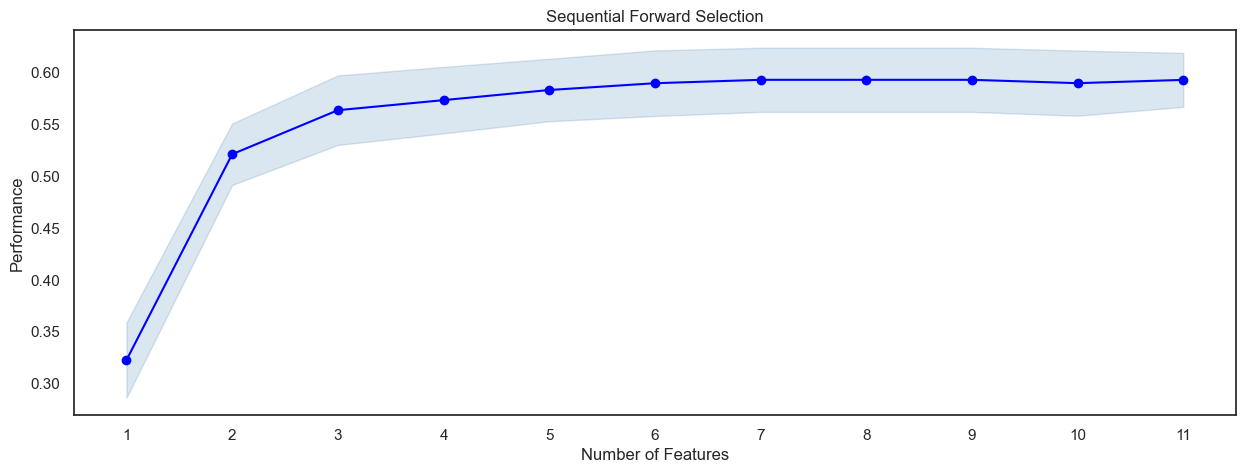

In [63]:
# Plotting the performance of the features
fig1= plot_sfs(sfs.get_metric_dict(), kind= "std_err", figsize = (15,5))
plt.title("Sequential Forward Selection")

plt.show()

In [64]:
# important features
list(sfs.k_feature_idx_)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [65]:
feature_names = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
                 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']
selected_feature_names = [feature_names[int(index)] for index in sfs.k_feature_names_]
print(selected_feature_names)

['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']


In [66]:
# selecting best performing features
sfs = SFS(logreg, k_features= 7, forward= True, verbose= 2, scoring= "recall",n_jobs = -1)

sfs = sfs.fit(x_train_sd,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  11 | elapsed:    4.2s remaining:   19.4s
[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    4.4s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    4.5s finished

[2023-05-29 21:25:34] Features: 1/7 -- score: 0.32247488101533583[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished

[2023-05-29 21:25:34] Features: 2/7 -- score: 0.521311475409836[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    0.0s finished

[2023-05-29 21:25:34] F

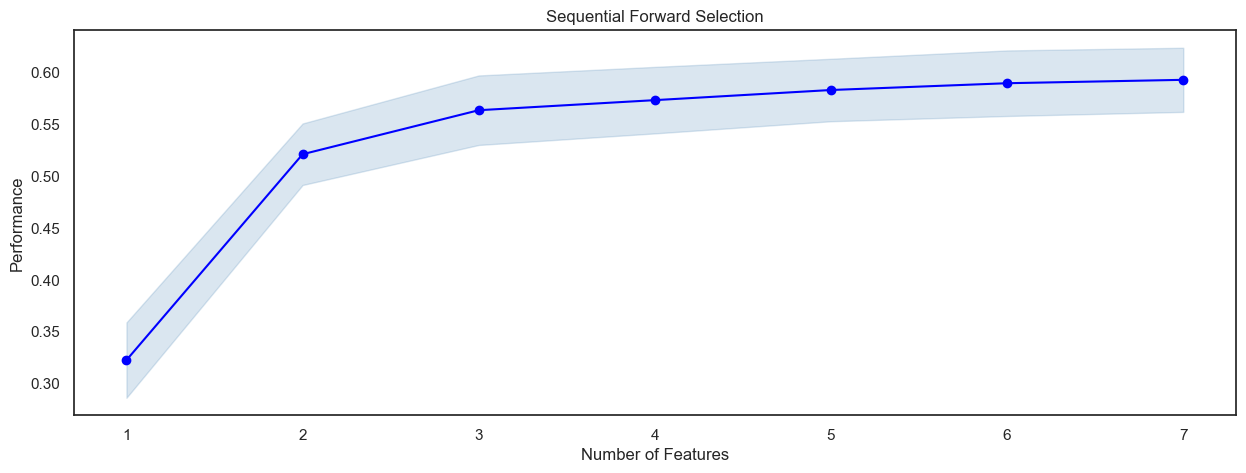

In [67]:
# Plotting the performance of the features
fig1= plot_sfs(sfs.get_metric_dict(), kind = "std_err", figsize = (15,5))
plt.title("Sequential Forward Selection")

plt.show()

In [68]:
# important features
list(sfs.k_feature_idx_)

[1, 2, 3, 4, 5, 6, 9]

In [69]:
selected_feature_names = [feature_names[int(index)] for index in sfs.k_feature_names_]
print(selected_feature_names)

['Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Online']


Based on the selected features by the Sequential Feature Selection (SFS) algorithm, the most significant variables for the model are:

Experience: The number of years of professional experience a customer has may impact their financial stability and ability to repay a loan. Customers with more experience might be seen as more financially reliable and therefore more likely to qualify for a personal loan.

Income: Higher income levels generally indicate a greater capacity to borrow and repay loans. Customers with higher incomes may be more eligible for personal loans due to their ability to meet repayment obligations.

Family: The size of a customer's family may influence their financial responsibilities and obligations. Customers with larger families might have higher expenses and, consequently, a greater need for financial assistance in the form of a personal loan.

CCAvg: CCAvg represents the average credit card spending of a customer. Higher credit card spending could indicate a higher disposable income or a greater reliance on credit, which might suggest a customer's willingness to take on additional debt in the form of a personal loan.

Education: The level of education attained by a customer might be associated with their financial stability and earning potential. Customers with higher education levels may have better job prospects and higher incomes, increasing their likelihood of qualifying for a personal loan.

Mortgage: The presence of a mortgage suggests that the customer has an existing housing loan. Customers with mortgages might be more familiar with the loan application process and comfortable taking on additional debt, making them more inclined to consider a personal loan.

Online: This binary feature indicates whether a customer uses online banking facilities. Customers who are active online users might be more receptive to digital financial products, including personal loans, and may be more likely to apply for them online.

These variables were identified as the most relevant for predicting the target variable (Personal Loan) based on the SFS algorithm.

In [70]:
# important features
feat_cols = list(sfs.k_feature_idx_)

x_train2 =x_train[x_train.columns[feat_cols]]
x_test2 = x_test[x_test.columns[feat_cols]]
x_val2 = x_val[x_val.columns[feat_cols]]

In [71]:
# renormalizing the original data
scaler = StandardScaler()

x_train2_sd = scaler.fit_transform(x_train2)
x_val2_sd = scaler.transform(x_val2)
x_test2_sd = scaler.transform(x_test2)

In [72]:
# re-build the logistic regression
log_reg2 = LogisticRegression(random_state = 0)

log_reg2.fit(x_train2_sd, y_train)

LogisticRegression(random_state=0)

###### Model 2

### Adjusting threshold

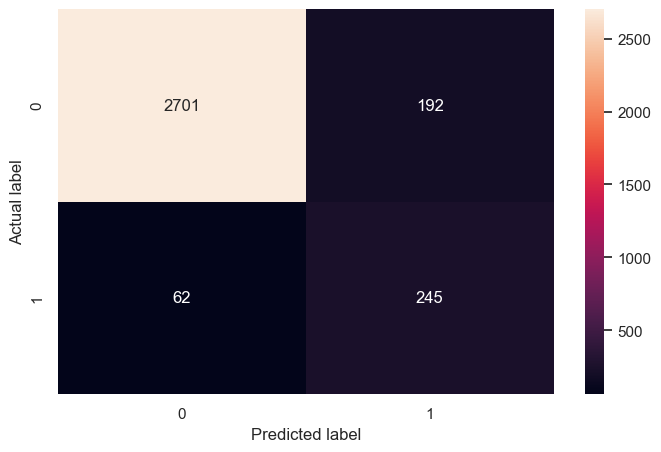

,Accuracy,Recall,Precision,F1-score
0,0.920625,0.798046,0.560641,0.658602


In [74]:
log_reg2_train = model_performance_classification(log_reg2, x_train2_sd, y_train, threshold  = 0.2)
log_reg2_train

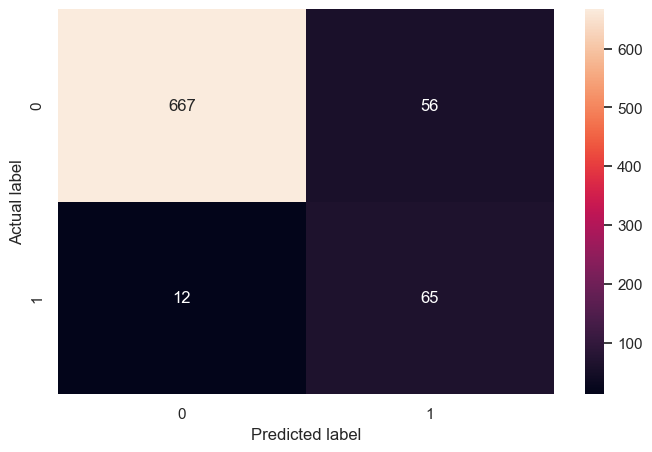

,Accuracy,Recall,Precision,F1-score
0,0.915,0.844156,0.53719,0.656566


In [75]:
log_reg2_val = model_performance_classification(log_reg2, x_val2_sd, y_val, threshold  = 0.2)
log_reg2_val

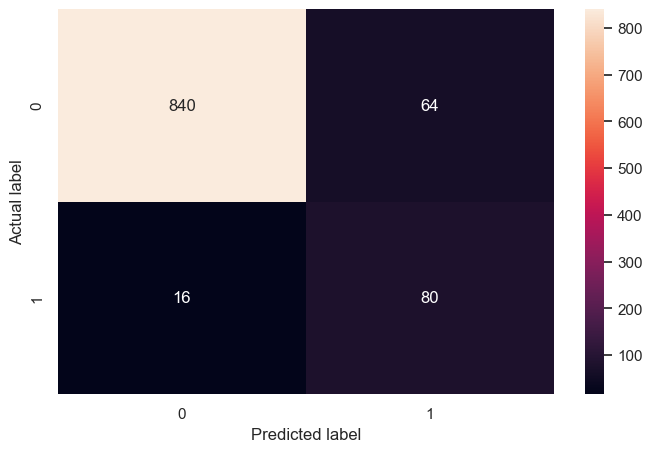

,Accuracy,Recall,Precision,F1-score
0,0.92,0.833333,0.555556,0.666667


In [76]:
log_reg2_test = model_performance_classification(log_reg2, x_test2_sd, y_test, threshold  = 0.2)
log_reg2_test

Based on the provided performance metrics, we can analyze the model's performance:

- Accuracy: The accuracy of the model is relatively high across the training, validation, and testing sets. This indicates that the model is making correct predictions for a significant portion of the data.

- Recall: The recall values for the model are also reasonably high, indicating that the model is able to identify a good proportion of the true positive instances (positive cases) in the data. Higher recall values suggest that the model is effective in capturing positive cases, which is generally desirable.

- Precision: The precision values, on the other hand, are relatively lower compared to accuracy and recall. This suggests that there is a higher number of false positives (negative cases predicted as positive) in the model's predictions. Higher precision values indicate a lower false positive rate, which is desired in certain scenarios.

- F1-score: The F1-scores combine precision and recall into a single metric. The F1-scores are moderate, indicating a balance between precision and recall.

The model appears to be performing reasonably well. The model is not severely overfitting or underfitting.  However, there could be room for improvement, particularly in terms of precision.

After Forward Feature Selection and adjusting the threshold Model 2 excels in recall, indicating its strength in capturing positive cases correctly.

##### Model 3

###### Balancing our imbalanced data using SMOTE

In [77]:
# instantiate the model

smt = SMOTE(random_state=0)

In [78]:
x_smt, y_smt = smt.fit_resample(x, y)

In [79]:
# Split the data into training and testing sets
x_train_val, x_test, y_train_val, y_test = train_test_split(x_smt, y_smt, test_size=0.2, 
                                                            random_state=0, stratify=y_smt)
# Further split the training set into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, 
                                                  test_size=0.2, random_state=0, stratify=y_train_val)

In [80]:
# Assign columns to scaled data

x_train_smt =x_train[x_train.columns[feat_cols]]
x_val_smt = x_val[x_val.columns[feat_cols]]
x_test_smt = x_test[x_test.columns[feat_cols]]

In [81]:
# renormalizing the original data
scaler = StandardScaler()

x_train_smt_sd = scaler.fit_transform(x_train_smt)
x_val_smt_sd = scaler.transform(x_val_smt)
x_test_smt_sd = scaler.transform(x_test_smt)

In [82]:
# re-build the logistic regression
log_reg3 = LogisticRegression(random_state = 0)

log_reg3.fit(x_train_smt_sd, y_train)

LogisticRegression(random_state=0)

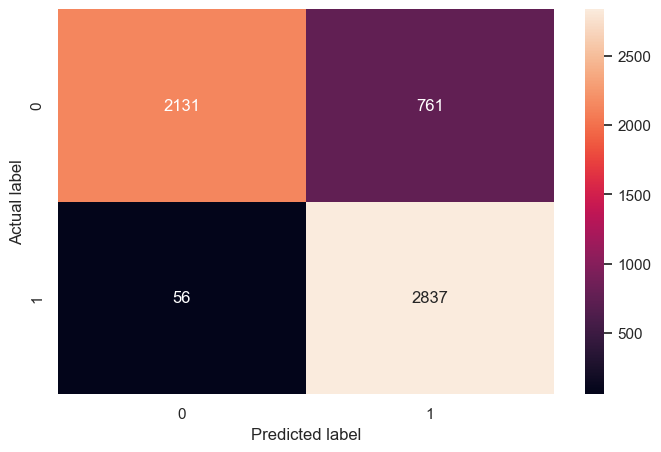

,Accuracy,Recall,Precision,F1-score
0,0.858773,0.980643,0.788494,0.874133


In [83]:
log_reg3_train = model_performance_classification(log_reg3, x_train_smt_sd, y_train, threshold  = 0.2)
log_reg3_train

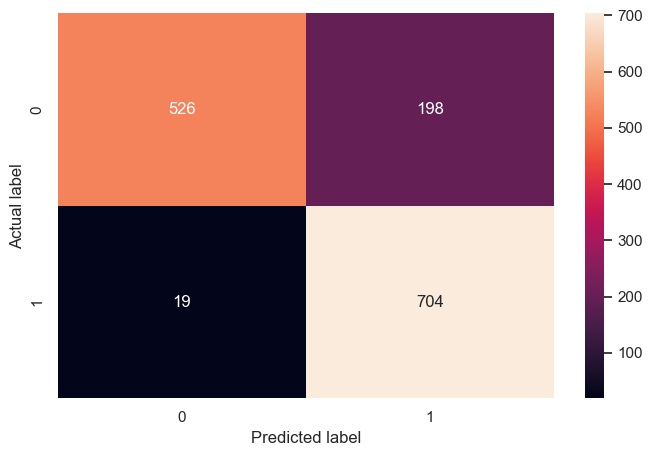

,Accuracy,Recall,Precision,F1-score
0,0.850035,0.973721,0.780488,0.866462


In [84]:
log_reg3_val = model_performance_classification(log_reg3, x_val_smt_sd, y_val, threshold  = 0.2)
log_reg3_val

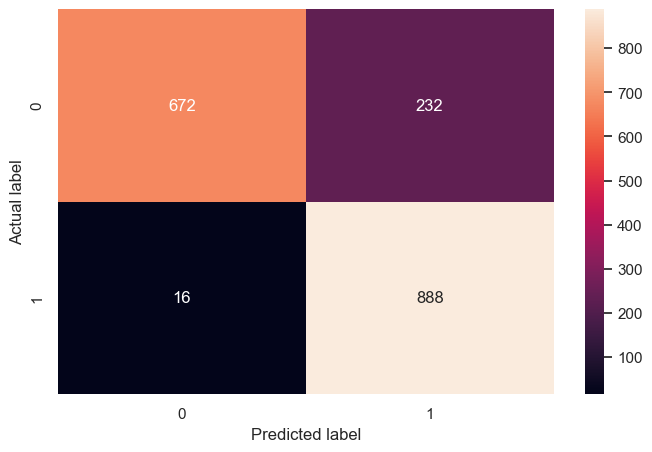

,Accuracy,Recall,Precision,F1-score
0,0.862832,0.982301,0.792857,0.87747


In [85]:
log_reg3_test = model_performance_classification(log_reg3, x_test_smt_sd, y_test, threshold  = 0.2)
log_reg3_test

Based on the provided performance metrics, it appears that Model 3 is generalizing well after balancing the data to improve the model. 

1. The accuracy scores on the training, validation, and test sets are relatively close, indicating that the model is performing consistently across different datasets. This suggests that the model is not overfitting to the training data and can generalize well to unseen data.

2. The recall scores are high, indicating that the model is correctly identifying a large proportion of positive instances (customers who are likely to take a personal loan). This is an important metric in this context as it is desirable to minimize false negatives (missing potential loan customers).

3. The precision scores are reasonably high, indicating that when the model predicts a positive instance, it is often correct. This is beneficial as it helps minimize false positives (customers predicted to take a loan but actually do not).

4. The F1-scores, which combine precision and recall into a single metric, are also relatively high. The F1-score considers both false positives and false negatives and provides a balanced measure of the model's performance.

Overall, the model demonstrates good performance on all the provided metrics, suggesting that it is generalizing well to new data and achieving a balance between correctly identifying loan customers (recall) and minimizing false predictions (precision).

Model 3 appears to have performed the best among the three models. It achieved the highest accuracy, recall, precision, and F1-score on the test set. 

### Model Building - Decision Tree

In [86]:
# create an instance
dec_tree = DecisionTreeClassifier(random_state= 0)

dec_tree.fit(x_train_smt, y_train)

DecisionTreeClassifier(random_state=0)

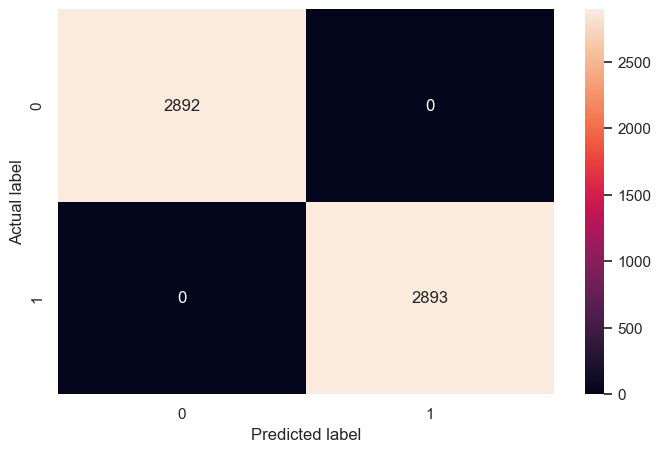

,Accuracy,Recall,Precision,F1-score
0,1.0,1.0,1.0,1.0


In [87]:
# training decision tree
dec_train = model_performance_classification(dec_tree, x_train_smt, y_train, threshold = 0.2)

dec_train 

Achieveing a perfect performance on training could indicate overfitting

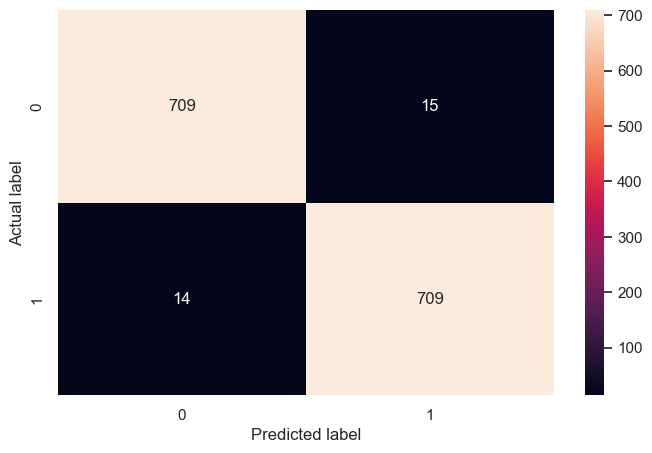

,Accuracy,Recall,Precision,F1-score
0,0.979959,0.980636,0.979282,0.979959


In [88]:
# validating decision tree
dec_val = model_performance_classification(dec_tree,x_val_smt, y_val)

dec_val

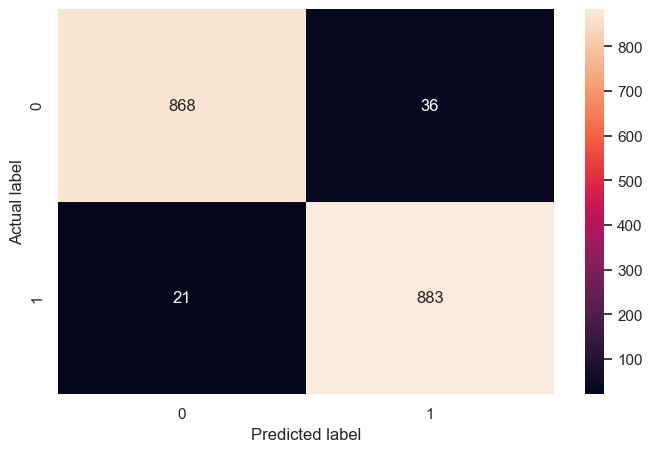

,Accuracy,Recall,Precision,F1-score
0,0.968473,0.97677,0.960827,0.968733


In [89]:
# testing decision tree
dec_test = model_performance_classification(dec_tree,x_test_smt, y_test)

dec_test

It appears that Model 4 (Decision tree) is performing well and generalizing well.
The model achieved high accuracy, recall, precision, and F1-score on both the training, validation and testing sets, indicating that it has learned the patterns in the training data and is able to generalize well to unseen data. The performance on the test set is also consistent with the performance on the training and validation set. The model could gradually become overfitting  if model performs well on training but underperforms on the testing and validation 

#### Visualizing feature importances for Decision Tree Algorithm

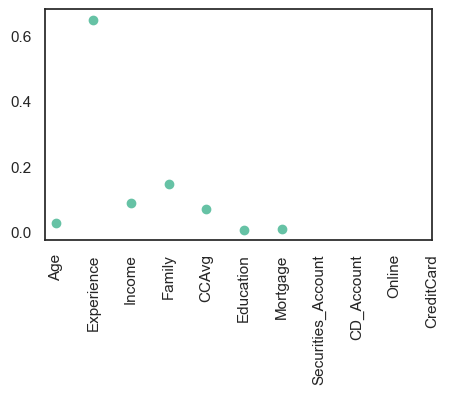

In [90]:
# using dot plot
plt.figure(figsize = (5,3))
plt.plot(dec_tree.feature_importances_, "o")
plt.xticks(range(x.shape[1]), x.columns, rotation = 90)
plt.show()

The key variables that have a strong relationship with the dependent variable (Personal Loan), the model suggests that Income, CCAvg, Family, Experience and Age are the most influential features. These variables have a significant impact on the prediction of whether a customer will take a personal loan or not. This information can be valuable for identifying potential customers who are more likely to be interested in personal loan products and for making targeted marketing and lending decisions 

### Applying pre-pruning strategy

- Set max_depth=4

- Threshold - 0.4

In [91]:
# build the model

# Apply pre-pruning by using max_depth of 4 for instance


dec1_tree = DecisionTreeClassifier(random_state= 0, max_depth = 4)

dec1_tree.fit(x_train_smt, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

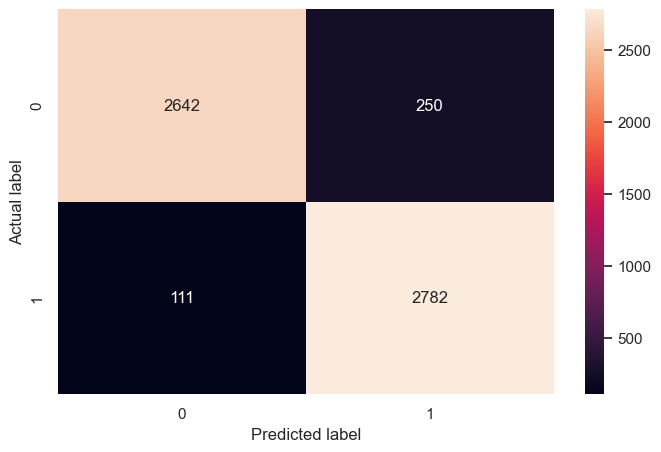

,Accuracy,Recall,Precision,F1-score
0,0.937597,0.961632,0.917546,0.939072


In [92]:
dec1_train = model_performance_classification(dec1_tree,x_train_smt, y_train, threshold = 0.4)

dec1_train

The decision tree model (Model 1) with a threshold of 0.4 is performing well on the training set. It achieves high accuracy, recall, precision, and F1-score values, indicating that the model is able to effectively classify instances and make accurate predictions

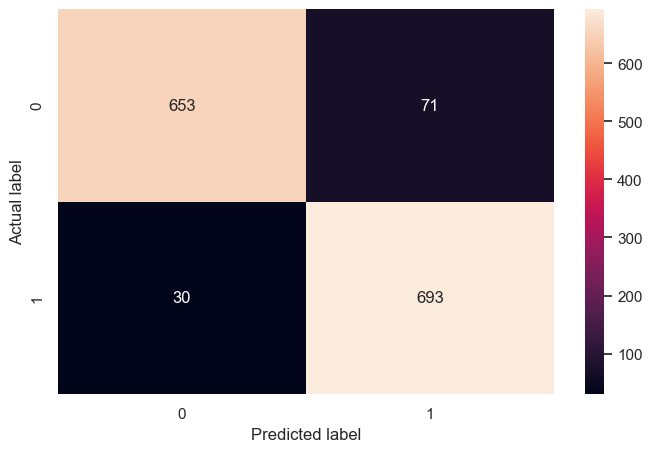

,Accuracy,Recall,Precision,F1-score
0,0.9302,0.958506,0.907068,0.932078


In [93]:
dec1_val = model_performance_classification(dec1_tree,x_val_smt, y_val, threshold = 0.4)

dec1_val

The performance of the model on the validation set is slightly lower than the performance on the training set, which is expected. However, the difference is not significant, suggesting that the model is not overfitting and is able to maintain its performance on new data

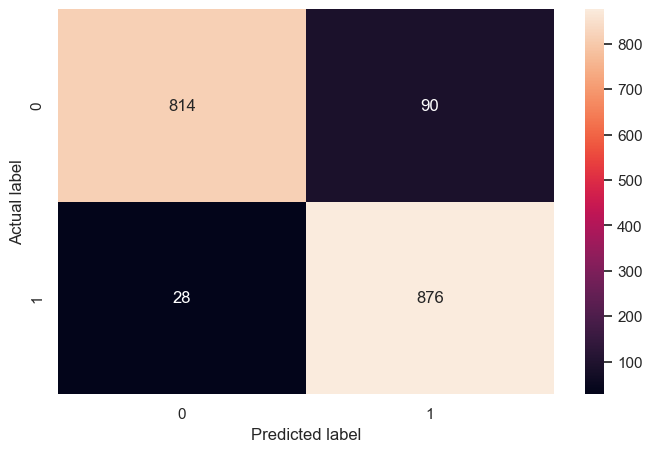

,Accuracy,Recall,Precision,F1-score
0,0.934735,0.969027,0.906832,0.936898


In [94]:
dec1_test = model_performance_classification(dec1_tree,x_test_smt, y_test, threshold = 0.4)

dec1_test

The decision tree model continues to perform well on the testing set. It achieves high accuracy, recall, precision, and F1-score values, indicating its ability to generalize well to new and unseen data.

Comparing the model's performance on the training, validation, and testing sets, we observe consistent and high performance across all three sets. This suggests that the model is not overfitting and is able to maintain its predictive capability on different datasets.

Overall, the model demonstrates strong performance, achieving high accuracy, recall, precision, and F1-score values on all three sets.

The decision tree model (Model 1) with a threshold of 0.4 shows strong performance in predicting the likelihood of a customer taking a personal loan. The model achieves high accuracy, recall, precision, and F1-score values on the training, validation, and testing sets, indicating its ability to effectively classify individuals who are likely to take a personal loan.

Minimizing false negatives (identifying all individuals likely to take a personal loan) is crucial, recall will be considered as the outstanding metric.

### Implementing Random Forests

In [95]:
# instanntiate the classifier
rf = RandomForestClassifier(random_state= 0)

# train the model
rf.fit(x_train_smt, y_train)

RandomForestClassifier(random_state=0)

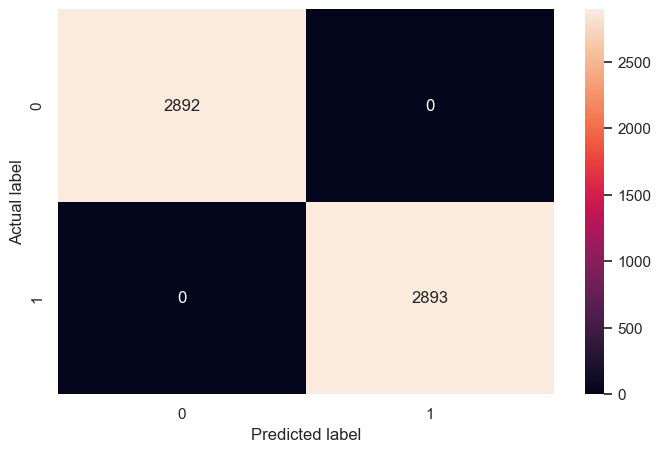

,Accuracy,Recall,Precision,F1-score
0,1.0,1.0,1.0,1.0


In [96]:
rf_train = model_performance_classification(rf,x_train_smt, y_train)

rf_train

The RandomForestClassifier model trained on the training set (x_train_smt, y_train) shows perfect performance on the training data with an accuracy, recall, precision, and F1-score of 1.0. This indicates that the model is able to classify all the training instances correctly, achieving 100% accuracy, recall, precision, and F1-score.

This perfection on the training could be a sign of overfitting. We assess the Validation and Test result to conclude

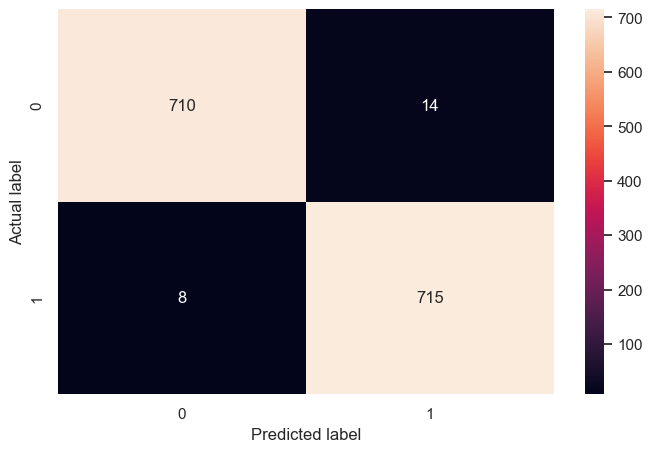

,Accuracy,Recall,Precision,F1-score
0,0.984796,0.988935,0.980796,0.984848


In [97]:
rf_val = model_performance_classification(rf,x_val_smt, y_val)

rf_val

Model exhibits high recall, precision, accuracy and F1 -score. Hence model identifies postitive instances while minimizing false positives. Model performance on validation is outstanding. We will evaluate the test set.

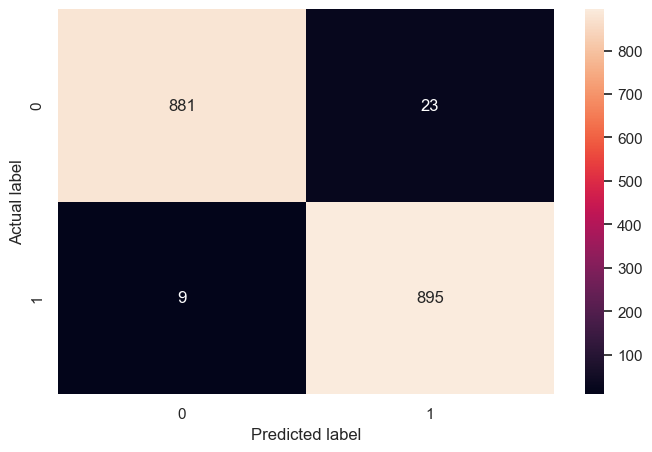

,Accuracy,Recall,Precision,F1-score
0,0.982301,0.990044,0.974946,0.982437


In [98]:
rf_test = model_performance_classification(rf,x_test_smt, y_test)

rf_test

The test set demonstrates high accuracy, precision, recall and F1- score. The test performance aligns witht the validation set indicating it generalizes well.

### Visualizing feature importances for the Random Forests Algorithm

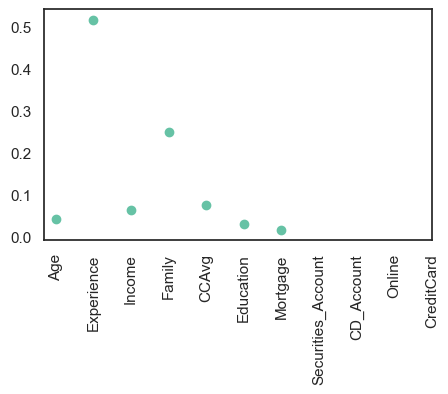

In [99]:
# using dot plot
plt.figure(figsize = (5,3))
plt.plot(rf.feature_importances_, "o")
plt.xticks(range(x.shape[1]), x.columns, rotation = 90)
plt.show()

The key variables that have a strong relationship with the dependent variable (Personal Loan), the model suggests that Experience, Family, CCAvg, Income and Age are the most influential features using RandomForest.Mortgage is the least strongest with the dependant variable. These variables have a significant impact on the prediction of whether a customer will take a personal loan or not.

### Second Model on RandomForest Classifier

To avoid a case of overfitting we review a second model using max depth of 4

In [100]:
# instantiate the classifier
rf2 = RandomForestClassifier(random_state= 0, max_depth= 4)

# train the model
rf2.fit(x_train_smt, y_train)

RandomForestClassifier(max_depth=4, random_state=0)

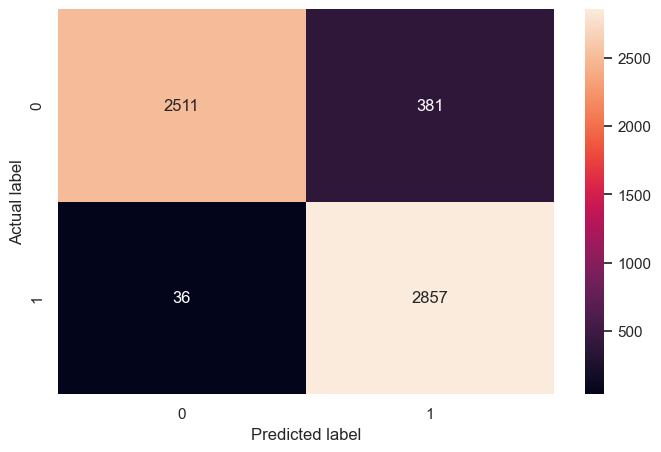

,Accuracy,Recall,Precision,F1-score
0,0.927917,0.987556,0.882335,0.931985


In [101]:
rf2_train = model_performance_classification(rf2,x_train_smt, y_train)

rf2_train

The performance metrics on the training set indicates model performed well on the training data set and captures high proportions of true positive instances while maintaining a reasonable balance between precision and recall

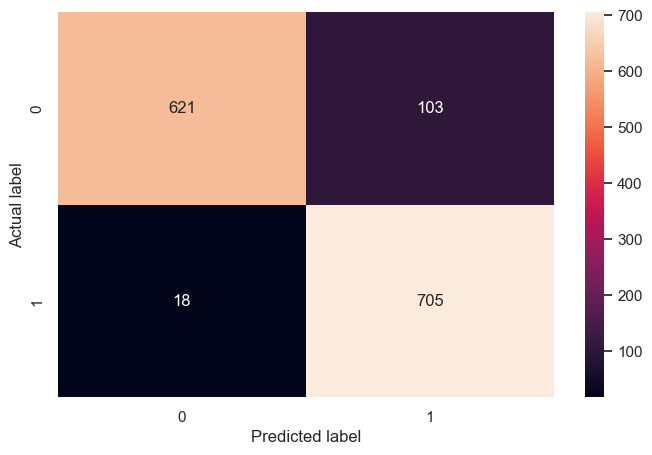

,Accuracy,Recall,Precision,F1-score
0,0.916379,0.975104,0.872525,0.920967


In [102]:
rf2_val = model_performance_classification(rf2,x_val_smt, y_val)

rf2_val

The performance metrics on the validation set indicates the model generalised well

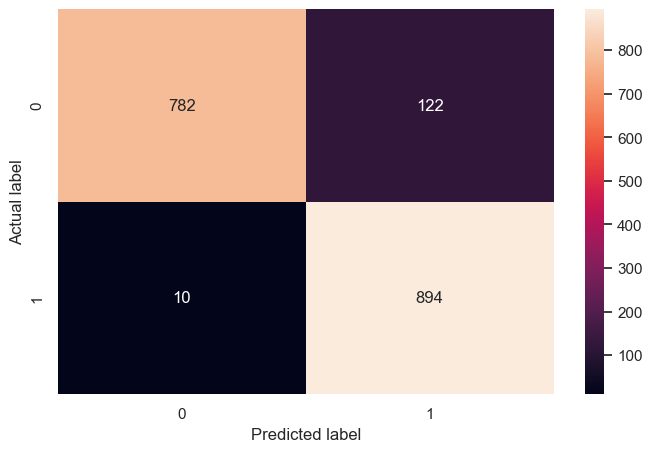

,Accuracy,Recall,Precision,F1-score
0,0.926991,0.988938,0.879921,0.93125


In [103]:
rf2_test = model_performance_classification(rf2,x_test_smt, y_test)

rf2_test

The performance metrics on the test set is closely aligning with training and validation sets indicating model is generalizing well.

The RF2 performed better than the previous RF. The RF2 does not appear to be significantly overfitting as well. It also performed better than Decision tree models 

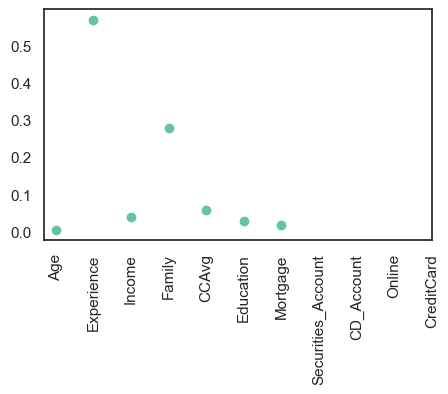

In [104]:
# using dot plot
plt.figure(figsize = (5,3))
plt.plot(rf2.feature_importances_, "o")
plt.xticks(range(x.shape[1]), x.columns, rotation = 90)
plt.show()

Age does not seem as strong as it was in the previous model It has the least relationship to Personal Loan. Mortgage seems to have a better relationship with the dependent variable prior to the first RF model. Experience has a very strong relationship followed by family. CCAvg also has a good relationship to Personal loan as well as Income and somehow Education.

### Implementing Gradient Boosting with Grid Search

In [105]:
# set the parameters to tune
param_grid = {'learning_rate': [0.001, 0.01, 0.1, 1, 10],
             'max_depth': [1, 2, 3, 4],
             "criterion":["friedman_mse", "mse"]}

# instantiate the models and grid search
gb = GradientBoostingClassifier(random_state=0)
grid = GridSearchCV(gb, param_grid, cv = 5, n_jobs = -1, scoring = "recall")


# fit the grid search model on the training set
grid.fit(x_train_smt, y_train)

C:\Users\SERWAH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
54 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\SERWAH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\SERWAH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py", line 420, in fit
    self._validate_params()
  File "C:\Users\SERWAH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\bas

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'mse'],
                         'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'max_depth': [1, 2, 3, 4]},
             scoring='recall')

In [106]:
# get he best parameters
best_params = grid.best_params_
best_params

{'criterion': 'friedman_mse', 'learning_rate': 0.001, 'max_depth': 2}

In [107]:
# get the scorer
grid.scorer_

make_scorer(recall_score, average=binary)

In [108]:
# get the best score
grid.best_score_

0.9975808427607558

In [109]:
# instantiate the classifier
gb = GradientBoostingClassifier(**best_params,random_state= 0)

# train the model
gb.fit(x_train_smt, y_train)

GradientBoostingClassifier(learning_rate=0.001, max_depth=2, random_state=0)

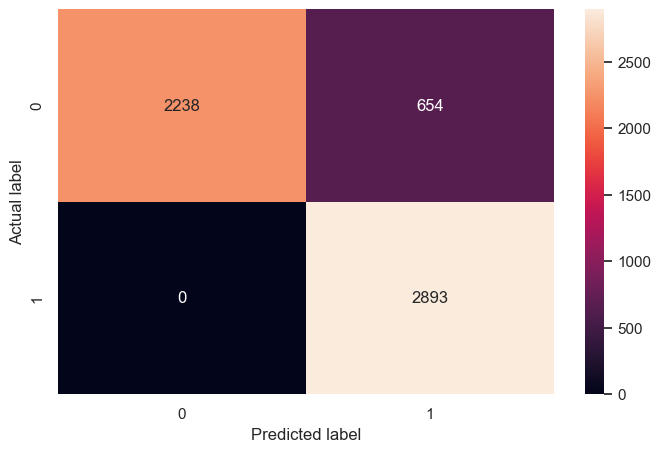

,Accuracy,Recall,Precision,F1-score
0,0.886949,1.0,0.815619,0.898447


In [110]:
gb_train = model_performance_classification(gb, x_train_smt, y_train)
gb_train

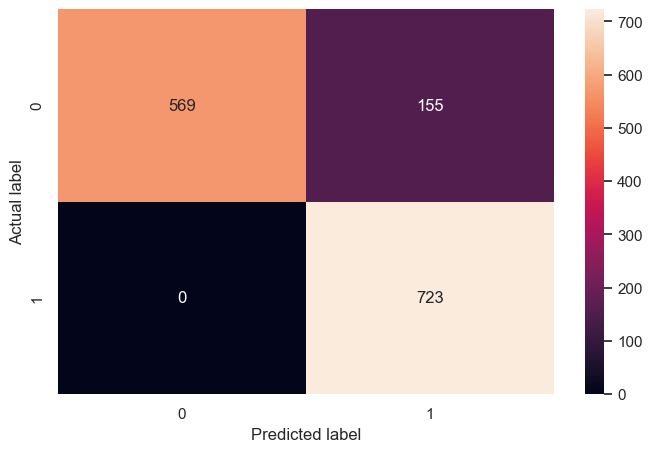

,Accuracy,Recall,Precision,F1-score
0,0.892882,1.0,0.823462,0.903186


In [111]:
gb_val = model_performance_classification(gb, x_val_smt, y_val)
gb_val

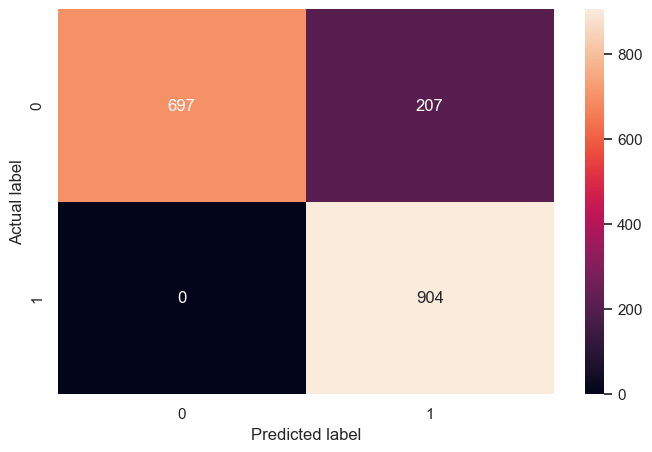

,Accuracy,Recall,Precision,F1-score
0,0.885509,1.0,0.813681,0.89727


In [112]:
gb_test = model_performance_classification(gb, x_test_smt, y_test)
gb_test

The accuracy scores for all three sets are relatively high, indicating that the model is making accurate predictions.

The recall scores are 1.0, which means that the model is correctly identifying all positive instances of Personal Loan in the dataset. This implies that the model is sensitive to capturing all potential customers who are likely to accept a personal loan offer. Achieving a recall of 1.0 could be a result of overfitting,

The precision scores are relatively high, but slightly lower than the recall scores, suggesting that there might be some false positive predictions. This means that some customers may be predicted as likely to accept a personal loan offer, but in reality, they may not be interested or eligible

The model seems to be generalizing well and not overfitting or underfitting. 

### Visualizing feature importances for the Gradient Boosting Algorithm

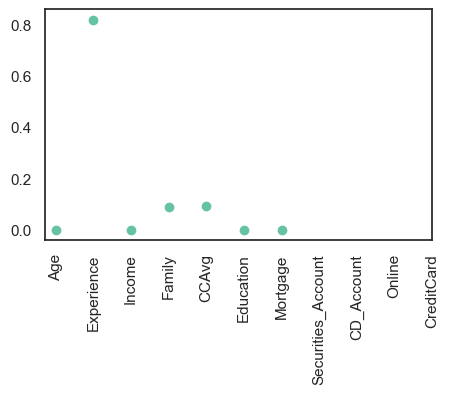

In [113]:
# using dot plot
plt.figure(figsize = (5,3))
plt.plot(gb.feature_importances_, "o")
plt.xticks(range(x.shape[1]), x.columns, rotation = 90)
plt.show()

The key variables that have a strong relationship with the dependent variable (Personal Loan), the model suggests that Experience has a very high relationship with the dependent variable, followed by Family and CCAvg. These relationship are nor as strong as that of Decision Tree and Random Forest models. Age, Income, Education and Mortgage hav some relationship with the dependant variable but cannot be said to be strong relationships. 

## Trying hyperparameter tuning techniques with Grid Search

In [114]:
# set the parameters to tune
param_grid = {'learning_rate': [0.005, 0.01, 0.1, 0.3],
             'max_depth': [3, 4],
             "criterion":["friedman_mse", "mse"]}

# instantiate the models and grid search
gb = GradientBoostingClassifier(random_state=0)
grid = GridSearchCV(gb, param_grid, cv = 5, n_jobs = -1, scoring = "recall")


# fit the grid search model on the training set
grid.fit(x_train_smt, y_train)

C:\Users\SERWAH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\SERWAH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\SERWAH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py", line 420, in fit
    self._validate_params()
  File "C:\Users\SERWAH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'mse'],
                         'learning_rate': [0.005, 0.01, 0.1, 0.3],
                         'max_depth': [3, 4]},
             scoring='recall')

In [115]:
# get the best parameters
best_params = grid.best_params_
best_params

{'criterion': 'friedman_mse', 'learning_rate': 0.3, 'max_depth': 4}

In [116]:
# get the best score
grid.best_score_

0.9827192809461487

In [117]:
# instantiate the classifier
gb2 = GradientBoostingClassifier(**best_params,random_state= 0)

# train the model
gb2.fit(x_train_smt, y_train)

GradientBoostingClassifier(learning_rate=0.3, max_depth=4, random_state=0)

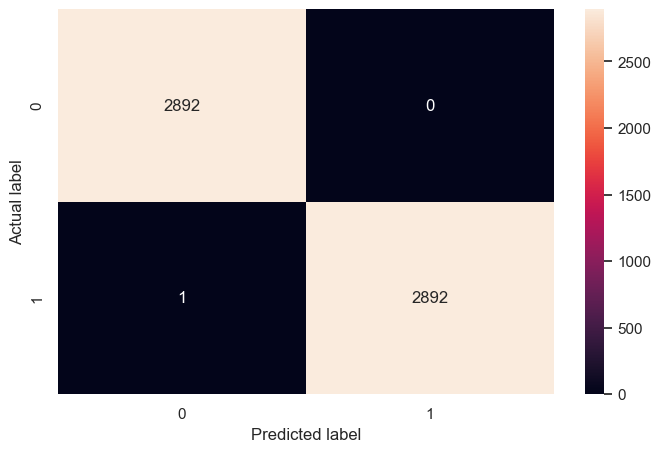

,Accuracy,Recall,Precision,F1-score
0,0.999827,0.999654,1.0,0.999827


In [118]:
gb2_train = model_performance_classification(gb2, x_train_smt, y_train)
gb2_train

For the training set, the model achieves high accuracy, recall, precision, and F1-score, indicating a good fit to the training data. However, it's important to note that the model may be potentially overfitting the training data, as it achieves almost perfect scores on all metrics

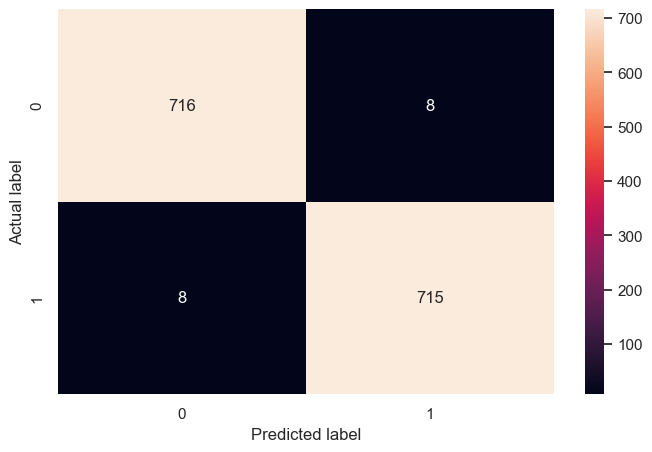

,Accuracy,Recall,Precision,F1-score
0,0.988943,0.988935,0.988935,0.988935


In [119]:
gb2_val = model_performance_classification(gb2, x_val_smt, y_val)
gb2_val

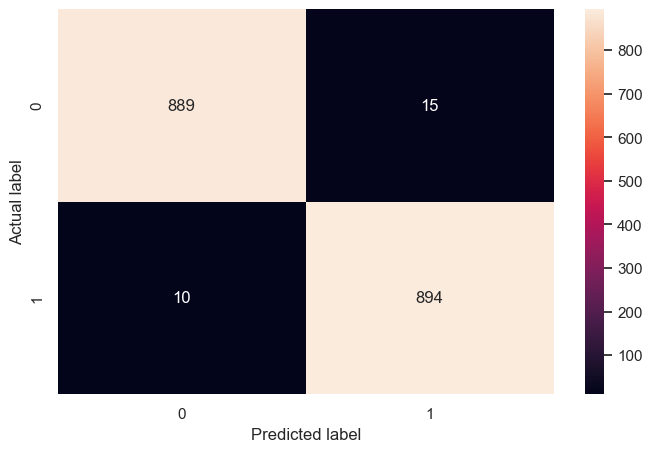

,Accuracy,Recall,Precision,F1-score
0,0.986173,0.988938,0.983498,0.986211


In [120]:
gb2_test = model_performance_classification(gb2, x_test_smt, y_test)
gb2_test

When evaluating the model on the validation and testing sets, we observe slightly lower but still impressive performance. The accuracy, recall, precision, and F1-score are consistently high, suggesting good generalization ability. These results indicate that the model is likely not overfitting and is performing well on unseen data

Comparing this model to the previous Gradient Boosting model (gb) without hyperparameter tuning, we can see that the tuned model (gb2) generally performs better. It achieves higher accuracy, recall, precision, and F1-score on the validation and testing sets, indicating improved overall performance. The hyperparameter tuning process helped optimize the model's hyperparameters, leading to enhanced performance and better generalization ability

## Actionable Insights & Recommendations

#### Compare Decision tree and Logistic regression

To compare the two models, let's analyze their performance metrics:

1. Logistic Regression Model 3:
- Training Set:
   - Accuracy: 0.859
   - Recall: 0.981
   - Precision: 0.788
   - F1-score: 0.874
- Validation Set:
   - Accuracy: 0.850
   - Recall: 0.974
   - Precision: 0.780
   - F1-score: 0.866
- Testing Set:
   - Accuracy: 0.863
   - Recall: 0.982
   - Precision: 0.793
   - F1-score: 0.877

2. Decision Tree Model 2:
- Training Set:
   - Accuracy: 0.938
   - Recall: 0.962
   - Precision: 0.918
   - F1-score: 0.939
- Validation Set:
   - Accuracy: 0.935
   - Recall: 0.969
   - Precision: 0.907
   - F1-score: 0.937

Interpretation:
- Both models show good performance on the training, validation, and testing sets, with relatively high accuracy and recall scores.
- The Logistic Regression Model 3 achieves slightly higher accuracy and recall on all three sets compared to the Decision Tree Model 2.
- The Logistic Regression Model 3 has a higher precision and F1-score on the testing set, indicating a better balance between precision and recall compared to the Decision Tree Model 2.
- Therefore, overall, the Logistic Regression Model 3 performed better than the Decision Tree Model 2 in terms of accuracy, recall, precision, and F1-score.

Based on the interpretation of the two models, here are the key takeaways for the marketing team:

1. Logistic Regression Model 3 performs better: The Logistic Regression Model 3 outperformed the Decision Tree Model 2 in terms of accuracy, recall, precision, and F1-score on the testing set. This indicates that the Logistic Regression model is more effective in predicting whether a customer will purchase a personal loan or not.

2. Focus on accuracy and recall: Both models achieved high accuracy and recall scores on the testing set, suggesting that they can effectively identify potential customers for personal loans. The marketing team should prioritize the recall metrics to maximize the campaign's success.

3. Further analyze important features: Both models highlighted certain variables that have a strong relationship with the decision to purchase a personal loan. For example, the Logistic Regression Model 3 identified Experience, Family, CCAvg, Income, Education, Age, and Mortgage as the important features. The marketing team should pay close attention to these variables and design targeted marketing campaigns based on customers' characteristics to increase the likelihood of personal loan purchases.

5. Continuous improvement: While the models have shown promising performance, it is important to continuously evaluate and improve the models over time. As customer preferences and behaviors change, retraining the models with updated data and exploring advanced modeling techniques can help enhance the predictive accuracy and capture evolving trends.

By considering these key takeaways and leveraging the insights from the models, the marketing team can make data-driven decisions and devise effective strategies to target potential customers with a higher probability of purchasing personal loans, ultimately driving the bank's loan business growth.

#### Advice as a data scientist at AllLife Bank to the marketing team on how to do the campaign

Target Customers with Higher Experience: Customers with higher experience levels have shown a strong relationship with the likelihood of purchasing personal loans. Therefore, the marketing campaign should prioritize targeting customers with more experience.

Consider Family Size: The number of family members also plays a significant role in the decision to purchase personal loans. Customers with larger families have shown a higher probability of purchasing personal loans. Thus, the marketing efforts should focus on reaching out to customers with larger families.

Focus on Customers with Higher CCAvg: Customers with higher average credit card spending (CCAvg) are more likely to opt for personal loans. Therefore, the marketing campaign should target customers who have a higher CCAvg, as they represent a segment with a higher probability of purchasing personal loans.

Consider Income Levels: Income is another important factor to consider. Customers with higher incomes have shown a stronger relationship with personal loan purchases. Hence, the marketing team should prioritize targeting customers with higher income levels.

Tailor Campaigns Based on Education Level: Education also influences the decision to purchase personal loans. Customers with higher education levels are more likely to opt for personal loans. Therefore, the marketing campaign should consider tailoring messages and offers to customers with higher educational backgrounds.

Segment Customers Based on Age: While age is not as strong of a predictor compared to other variables, it still has some impact on the decision to purchase personal loans. The marketing team can consider segmenting customers based on age groups and customizing campaigns accordingly.

Mortgage Influence is Limited: The analysis indicates that the presence of a mortgage has a relatively weak relationship with the decision to purchase personal loans. While it is still a factor to consider, it may not be the most crucial aspect for targeting customers.

Based on these key takeaways, the marketing team should develop campaigns that specifically target customers with higher experience, larger family sizes, higher CCAvg, higher incomes, and higher education levels. By tailoring the messaging and offers to these segments, the chances of attracting customers who are more likely to purchase personal loans will be maximized. Additionally, regular evaluation and refinement of the campaigns based on customer responses and feedback will help optimize the marketing efforts further.